<a href="https://colab.research.google.com/github/SenseiBassa/Nexux-Capstone-1/blob/main/Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bassa, Joshua Samuel  2023 10Alytics Capstone project 1**

---


###>May 19, 2023


##**Customer Segmentation and Deposit Detection system Case Study**

---


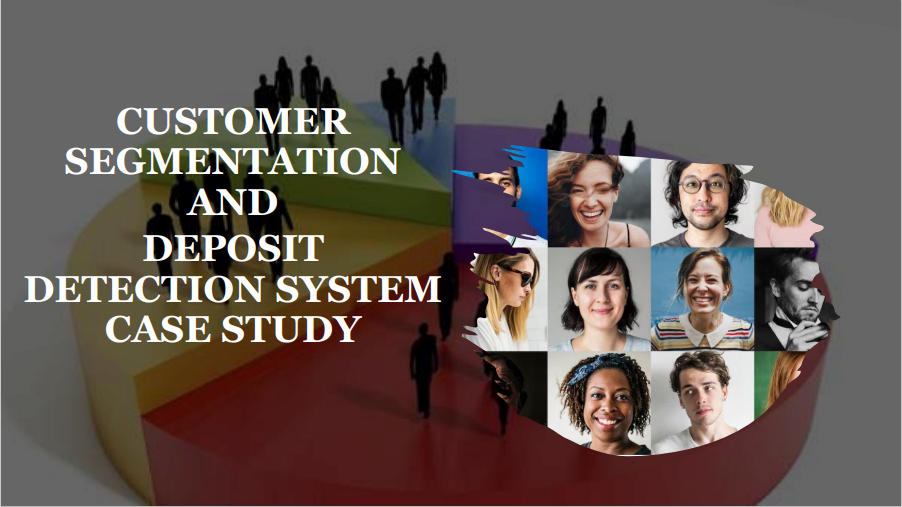

In [25]:
Image('/content/1st.PNG')
Image('/content/1st.PNG', width=1200, height=700)


##**Nexux Bank**

---



##**Introduction**

---


Nexus Bank is a financial institution that aims to provide exceptional banking 
services tailored to the specific needs and goals of its clients. They offer a wide range of banking solutions and prioritize delivering high-quality service, transparency, and honesty. However, during a recent board meeting, the directors expressed dissatisfaction with the current state of affairs and recognized the need to optimize operations and improve efficiency.



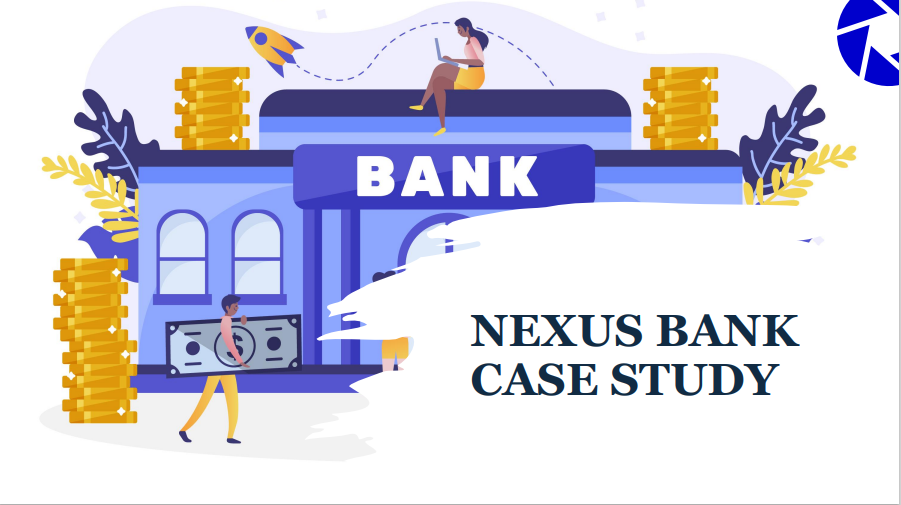

In [26]:
Image('/content/2nd.PNG')
Image('/content/2nd.PNG', width=1200, height=700)




---


##**Problem Overview**
In her pursuit of acquiring deposits, Nexus Bank has conducted various campaigns. However, during their recent board meeting, the directors expressed dissatisfaction with their current situation and emphasized the need to optimize our operations. To address this challenge, the Director of Nexus Bank reached out to me, as they believe in harnessing the power of data to gain valuable insights and enhance our efficiency. 

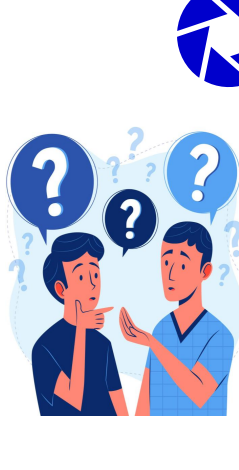

In [27]:
Image('/content/4th.PNG')
Image('/content/4th.PNG', width=1000, height=700)



##**Objectives**

---


My primary objective is to identify patterns and trends in customer behavior, specifically examining how demographic factors like age and education influence customers' attitudes towards defaulting. 

##**Aim**

---


- To anticipate future customer behavior and assess the likelihood of deposits from their customers.
- To optimize operations, mitigate risks associated with loan defaults, and improve customer deposits.
- To evaluate the effectiveness of their campaigns and develop targeted marketing strategies to reach specific customer segments. 
  (by analyzing customer behaviors, loan trends, and the impact of their marketing campaigns).

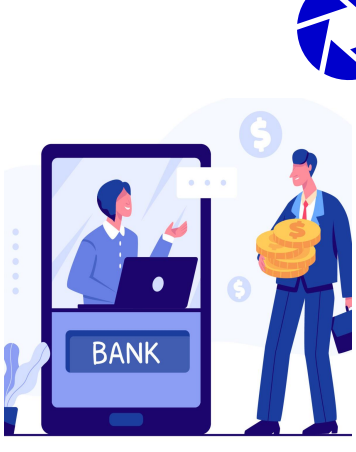

In [28]:
Image('/content/3rd.PNG')
Image('/content/3rd.PNG', width=1200, height=700)


##**Expected Deliverable**

---
The Director of Nexus Bank has reached out for assistance in leveraging the available data to gain insights into the bank and enhance its performance.
The board wants me to analyze customer behavior patterns and trends, particularly focusing on the impact of customer demographics on attitudes towards defaulting, in order to anticipate future customer behavior and determine the likelihood of customer deposits.


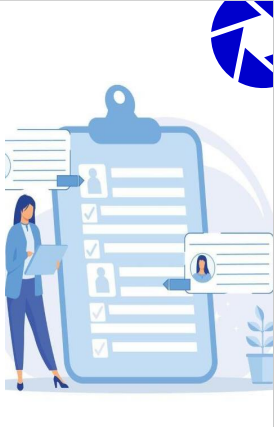

In [29]:
Image('/content/5th.PNG')
Image('/content/5th.PNG', width=1200, height=700)

### 1. IMPORTING NECESSARY LIBRARIES

---



In [30]:
# Import necessary libraries

# Data analysis libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

# data preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #helps to normalizes data between zero an one

import warnings
warnings.filterwarnings("ignore")

# Classifiers libraries i.e machine learning algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score

import xgboost

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from IPython.display import Image


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
# read/load the Bank dataset
df = pd.read_excel(r"/content/bank.xlsx")

In [33]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [34]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [36]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [37]:
df.shape

(45211, 17)

In [38]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


<Axes: >

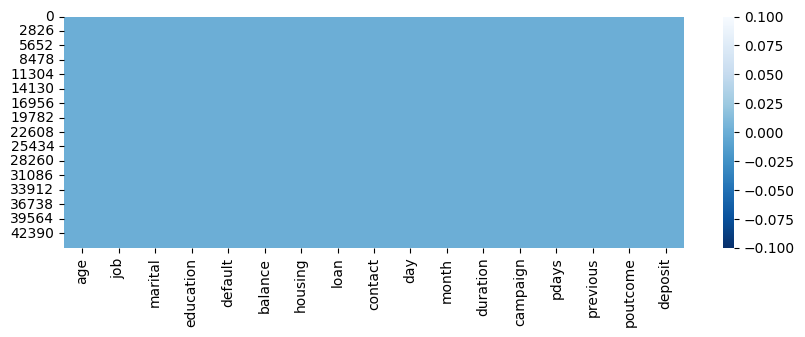

In [39]:
# Check for missing values in the dataframe
missing_values_count = df.isnull().sum()
print(missing_values_count)

# Visualize missing values using a heatmap
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(),cbar = True, cmap = "Blues_r")

### 2.0 Data Cleaning and Pre-Processing

### 2.1 Data Pre-Processing

In [40]:
# Checking for duplicates
print(df.duplicated().sum())


0


## Exploratory Data Analysis

- Univariate
- Bivariate
- Multivariate

## Univariate Analysis

In [41]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

<Axes: xlabel='age'>

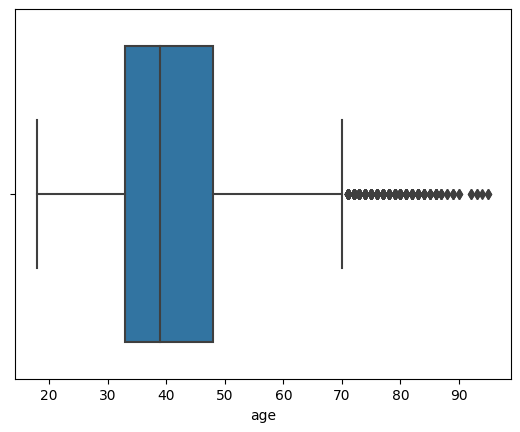

In [42]:
# Check for outliers

sns.boxplot(x=df["age"])

Narration:

The plotted data above reveals a substantial number of outliers that are scattered beyond the 70 point.

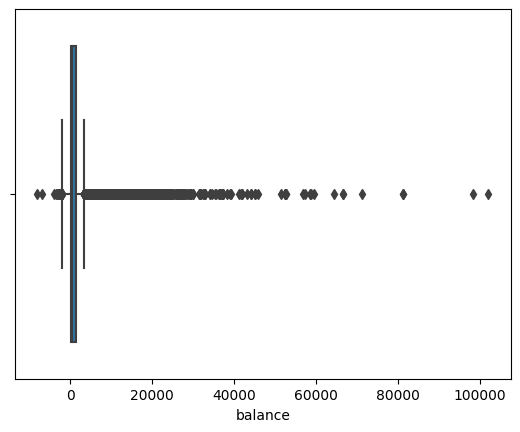

In [43]:
# Check for outliers
sns.boxplot(x=df["balance"]);

Narration

The plot depicted above demonstrates a significant presence of outliers, spread throughout the range from 100 to 100000. Furthermore, the upper and lower quartile margins appear to be quite close together, indicating a relatively narrow distribution of the data.

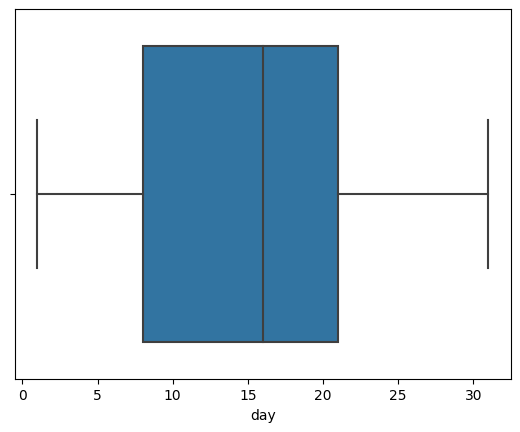

In [44]:
# Check for outliers
sns.boxplot(x=df["day"]);

Narration:

No outliers were detected in this plot, and the margins between the upper quartile and lower quartile are moderate or wide, indicating a reasonable or substantial spread of the data.

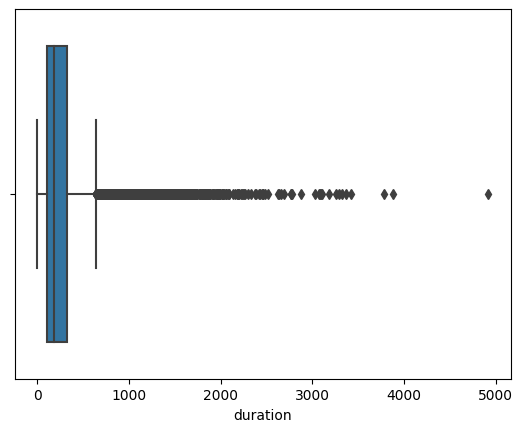

In [45]:
# Check for outliers
sns.boxplot(x=df["duration"]);

Narration:

The gap between the upper and lower quartiles is narrow, indicating a limited range of data. Additionally, there is a significant presence of outliers scattered above the 800 point up to the 5000 point.

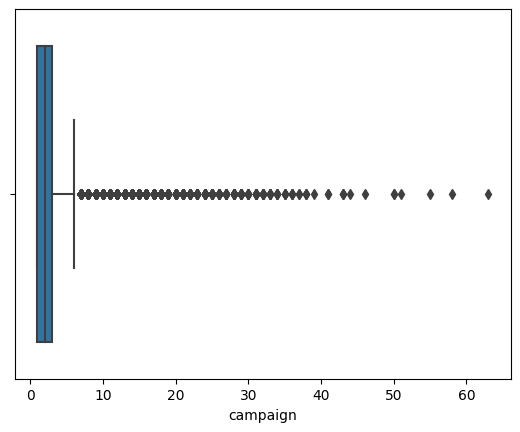

In [46]:
# Check for outliers
sns.boxplot(x=df["campaign"]);

Narration:

The plot above displays a narrow range between the upper and lower quartile scores and shows a significant presence of outliers.

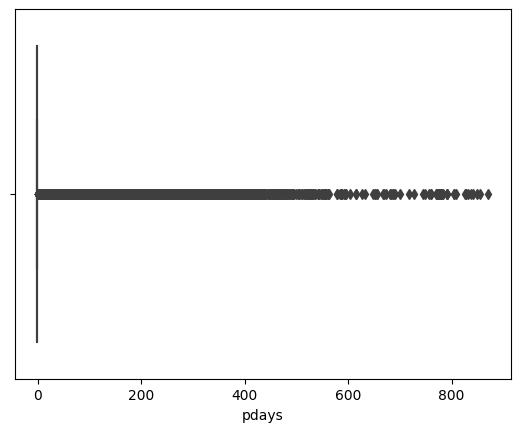

In [47]:
# Check for outliers
sns.boxplot(x=df["pdays"]);

Narration:

The above plot exhibits a considerable number of outliers, with an upper and lower class that is either non-existent or extremely negligible.

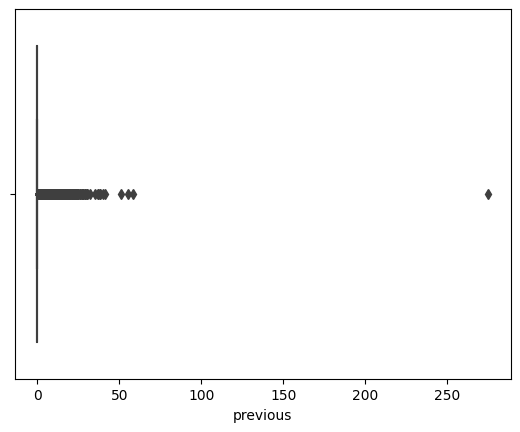

In [48]:
# Check for outliers
sns.boxplot(x=df["previous"]);

Narration:

The above plot exhibits a considerable number of outliers, with an upper and lower class that is either non-existent or extremely negligible.

## Bivariate Analysis

In [49]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

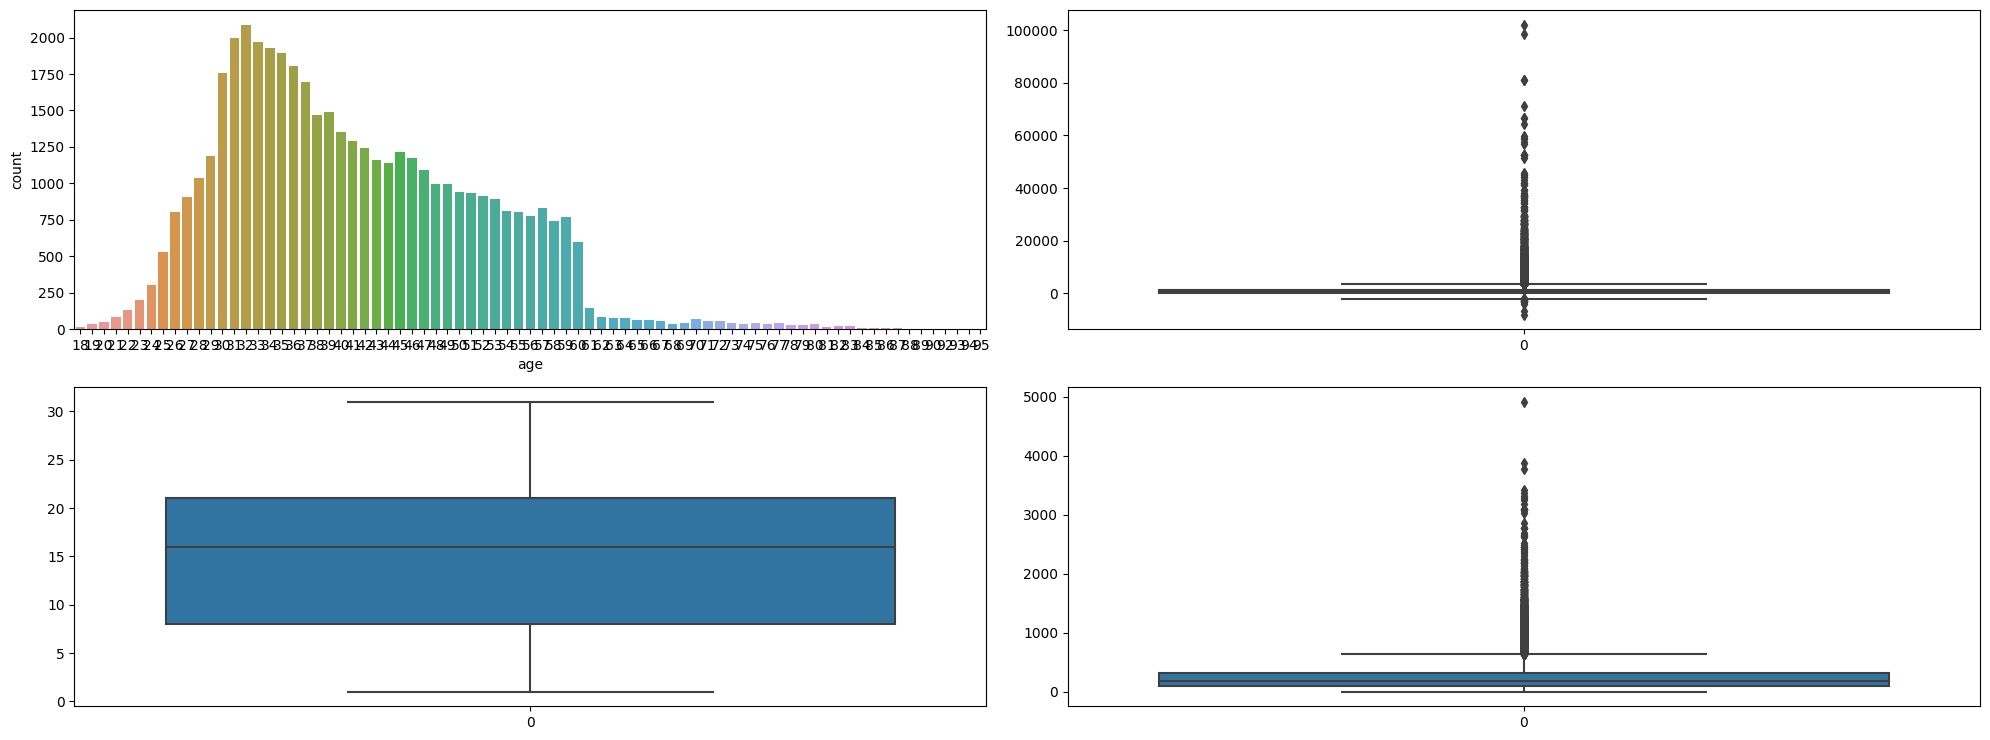

In [51]:
fig, axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.countplot(x=df['age'], ax = axs[0,0])
plt2 = sns.boxplot(df['balance'], ax = axs[0,1])
plt3 = sns.boxplot(df['day'], ax = axs[1,0])
plt4 = sns.boxplot(df['duration'], ax = axs[1,1])

plt.tight_layout()

In [53]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

### 2.2 Data Cleaning

---



#### 2.2.1 Removing outliers in campaign

---



In [54]:
# Deploying the percentile limit of 0.20 and 0.80
Q1=df.duration.quantile(0.20)
Q3 = df.duration.quantile(0.80)
Q1, Q3

(89.0, 368.0)

In [55]:
IQR =Q3-Q1
IQR

279.0

In [56]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit, upper_limit

(-329.5, 786.5)

### 2.2.2 The Outliers

---



In [57]:
# Identifying the outliers

df[(df.duration<lower_limit) | (df.duration>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,no
53,42,admin.,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,no
59,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,-1,0,unknown,no
61,53,technician,divorced,secondary,no,989,yes,no,unknown,5,may,812,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45072,54,management,divorced,tertiary,no,5475,no,no,cellular,21,oct,1032,1,91,4,success,yes
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


In [58]:
# Removing the outliers
df_no_outlier = df[(df.duration>lower_limit) & (df.duration<upper_limit)]
df_no_outlier

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [59]:
# Removing the outlier in 'previous' which has an extreme value of 275
df_no_outlier=df_no_outlier[df_no_outlier['previous'] < 250]
df_no_outlier.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [60]:
df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43187 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43187 non-null  int64 
 1   job        43187 non-null  object
 2   marital    43187 non-null  object
 3   education  43187 non-null  object
 4   default    43187 non-null  object
 5   balance    43187 non-null  int64 
 6   housing    43187 non-null  object
 7   loan       43187 non-null  object
 8   contact    43187 non-null  object
 9   day        43187 non-null  int64 
 10  month      43187 non-null  object
 11  duration   43187 non-null  int64 
 12  campaign   43187 non-null  int64 
 13  pdays      43187 non-null  int64 
 14  previous   43187 non-null  int64 
 15  poutcome   43187 non-null  object
 16  deposit    43187 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### 3.0 Exploratory Data Analysis (EDA)

---



#### Age Analysis

---



In [61]:
# Inspecting the covered Ages
print('Max. Age: ',df_no_outlier['age'].max())
print('Min. Age: ',df_no_outlier['age'].min()) 

Max. Age:  95
Min. Age:  18


In [62]:
# Age categorization

def age_bracket(age):
    if age <= 30:
        return 'Young (<=30)'
    elif age <= 45:
        return 'Adults (<=45)'
    elif age <= 70:
        return 'Old Adult (<=70)'
    else:
        return 'Geriatric (>=71)'

# Assuming 'df_no_outlier' is a DataFrame containing an 'age' column

df_no_outlier['age_bracket'] = df_no_outlier['age'].apply(age_bracket)

print(df_no_outlier.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  \
0  unknown    5   may       261         1     -1         0  unknown      no   
1  unknown    5   may       151         1     -1         0  unknown      no   
2  unknown    5   may        76         1     -1         0  unknown      no   
3  unknown    5   may        92         1     -1         0  unknown      no   
4  unknown    5   may       198         1     -1         0  unknown      no   

        age_bracket  
0  Old Adult (<=70)  
1     Adults (<=45)  
2     Adults (

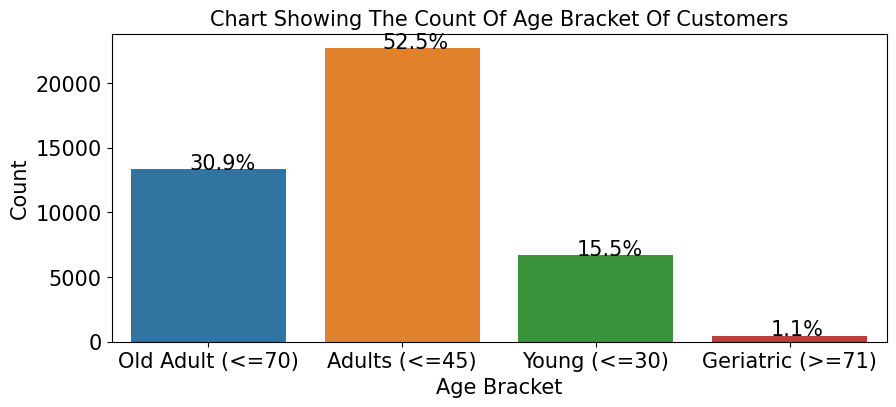

In [63]:
# Age bracket analysis

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['age_bracket'], data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Age Bracket', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing The Count Of Age Bracket Of Customers', size=15)

# Calculate percentages
total = float(len(df_no_outlier['age_bracket']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

### Narration:
According to the provided chart, the bank's customer base is predominantly composed of the 'Adult' age range and 'Old Adult' age range, accounting for 52.5% and 30.9% respectively, while the 'Aged' group has the lowest representation at 1.1% of the customer base.

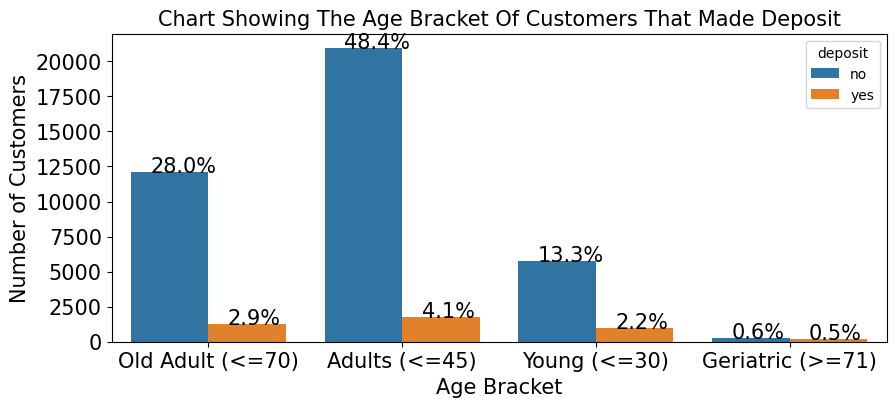

In [64]:
# Analyzing the age ranges that made deposit

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['age_bracket'], hue='deposit', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Age Bracket', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('Chart Showing The Age Bracket Of Customers That Made Deposit', size=15)

# Calculate percentages
total = float(len(df_no_outlier['age_bracket']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

### Narration:
The largest percentage of customers who did not make a deposit at the bank comes from the 'Adults' and 'Old Adults' groups.

### 3.1 Exploring the contact feature

---



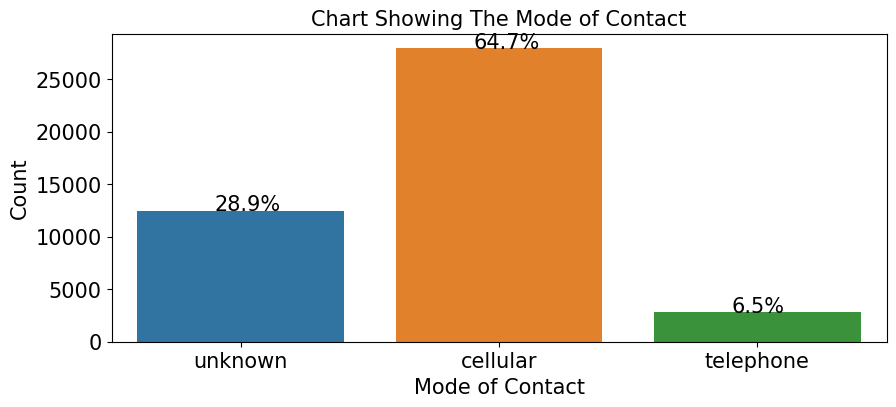

In [65]:
# Contact feature analysis

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['contact'], data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Mode of Contact', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing The Mode of Contact', size=15)
# Calculate percentages
total = float(len(df_no_outlier['contact']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

###  Narration:
Customers contacted via cellular mode of contact had a higher success rate compared to unknown and telephone contact modes.

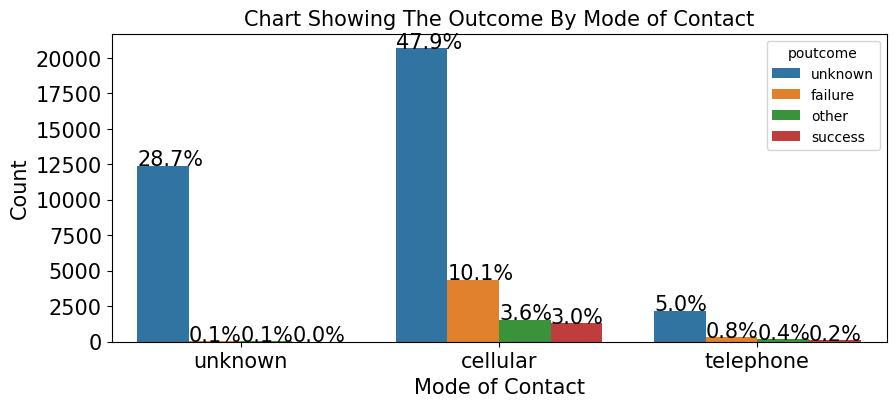

In [66]:
# Analyzing the contact feature

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['contact'],hue='poutcome', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Mode of Contact', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing The Outcome By Mode of Contact', size=15)
# Calculate percentages
total = float(len(df_no_outlier['contact']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

### Narration:
Customers contacted via cellular communication had a higher success rate compared to other contact modes.

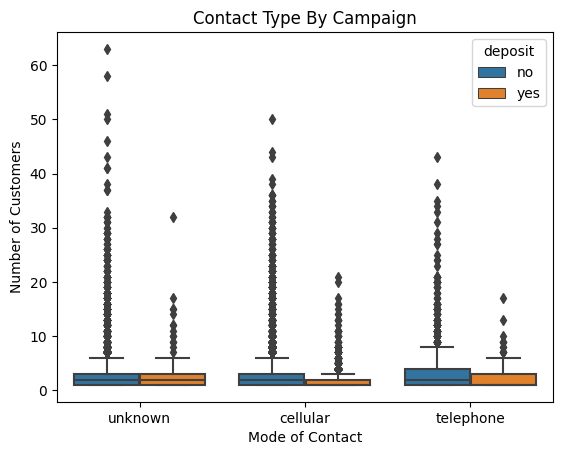

In [67]:
sns.boxplot(x='contact', y='campaign',hue='deposit', data=df_no_outlier)
plt.xlabel('Mode of Contact')
plt.ylabel('Number of Customers')
plt.title('Contact Type By Campaign');

### Narration:
The above chart does not reveal a clear distinction in the distribution of customers contacted through different platforms to determine their influence on deposit behavior.

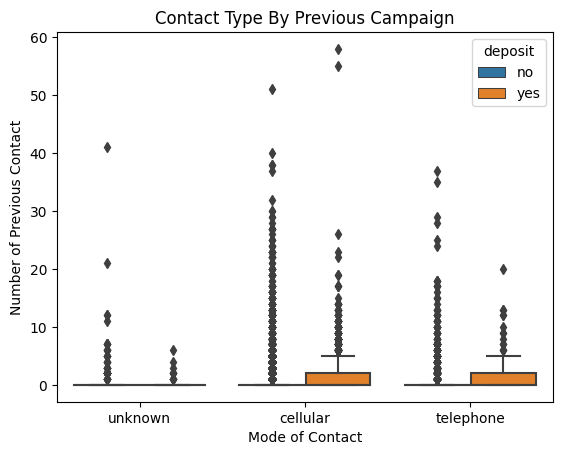

In [68]:
sns.boxplot(x='contact', y='previous',hue='deposit', data=df_no_outlier)
plt.xlabel('Mode of Contact')
plt.ylabel('Number of Previous Contact')
plt.title('Contact Type By Previous Campaign');

### Narration
- The above chart does not reveal a clear distinction in the distribution of customers contacted through different platforms to determine their influence on deposit behavior.
- Customers who adopted cellular mode of contact and telephone had higher number of previous campaign compared to 'unknown' that had none.

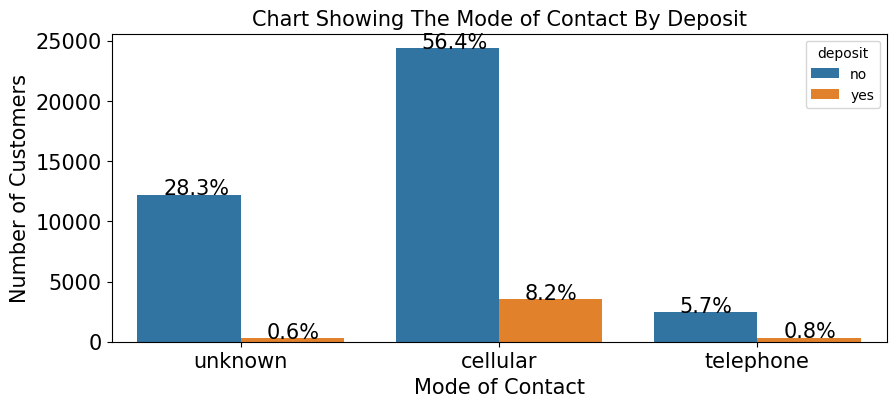

In [69]:
# Analyzing the contact feature by deposit

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['contact'],hue='deposit', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Mode of Contact', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('Chart Showing The Mode of Contact By Deposit', size=15)

# Calculate percentage
total = float(len(df_no_outlier['contact']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

### Narration:
Customers contacted via cellular communication exhibited a higher percentage of deposit behavior. 

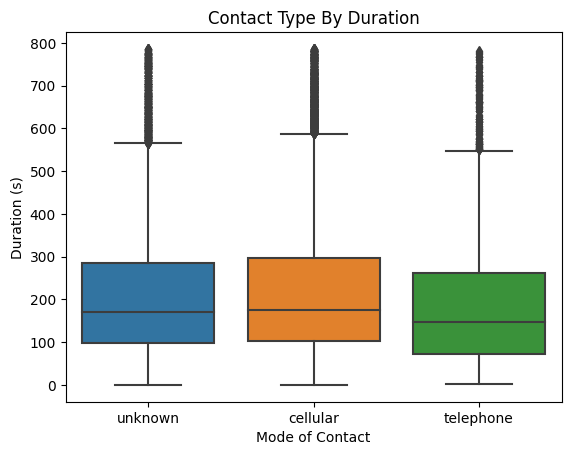

In [70]:
sns.boxplot(x='contact', y='duration', data=df_no_outlier)
plt.xlabel('Mode of Contact')
plt.ylabel('Duration (s)')
plt.title('Contact Type By Duration');

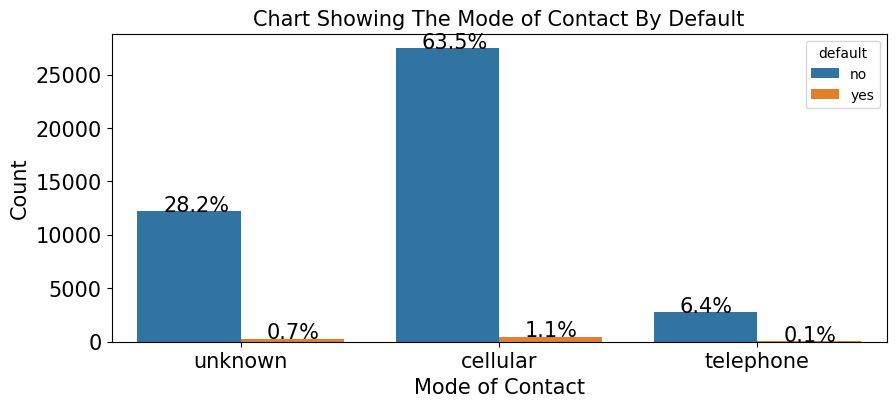

In [71]:
# Contact feature by deposit analysis

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['contact'],hue='default', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Mode of Contact', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing The Mode of Contact By Default', size=15)

# Calculate percentages
total = float(len(df_no_outlier['contact']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

### Narration: 
The chart above shows cellular mode of contact having a 63.5% 'no' count whereas a 1.1% 'yes' count - this is higher than what the other two modes had.

### 3.2 Analyzing the Job Feature

---



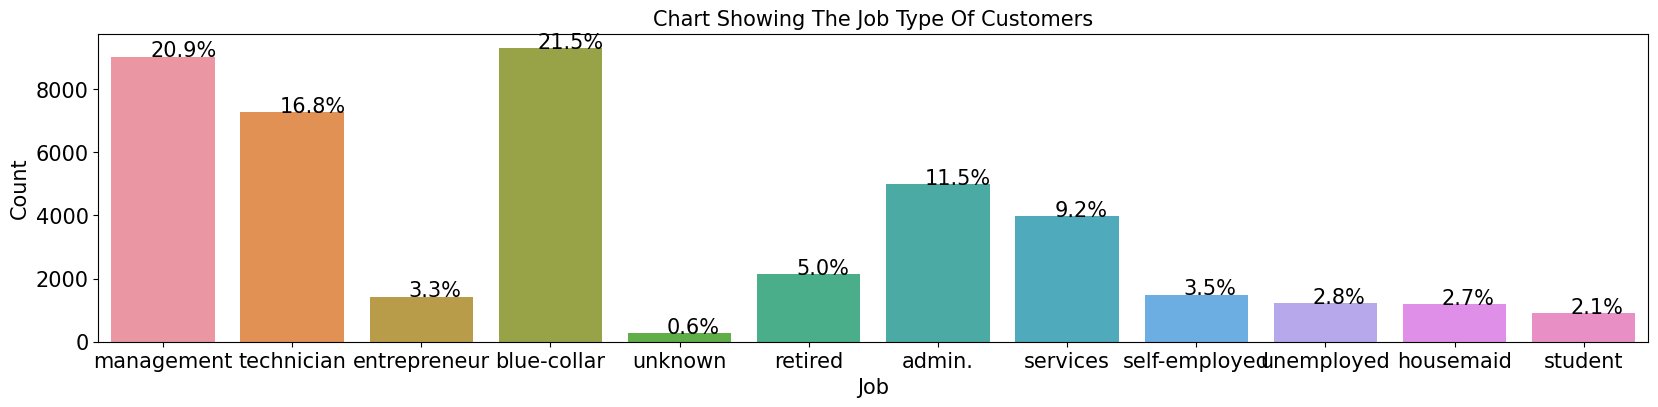

In [72]:
# analyzing the job types

plt.figure(figsize=(20,4))
ax = sns.countplot(x=df_no_outlier['job'], data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Job', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing The Job Type Of Customers', size=15)
# Calculate percentages
total = float(len(df_no_outlier['job']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

### Narration:
A significant percentage of the bank's customer base comprises blue-collar workers (21.5%), followed by management (20.9%), technicians (16.8%), and administrative staff (11.4%).


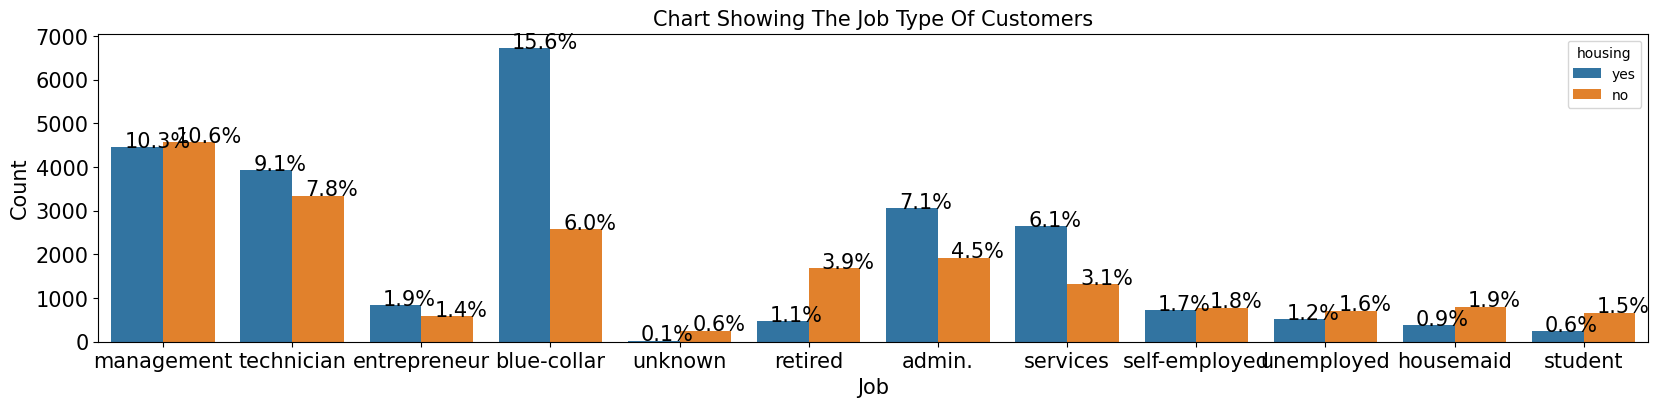

In [73]:
# Job types analysis

plt.figure(figsize=(20,4))
ax = sns.countplot(x=df_no_outlier['job'],hue='housing', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Job', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing The Job Type Of Customers', size=15)

# Calculate percentages
total = float(len(df_no_outlier['job']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

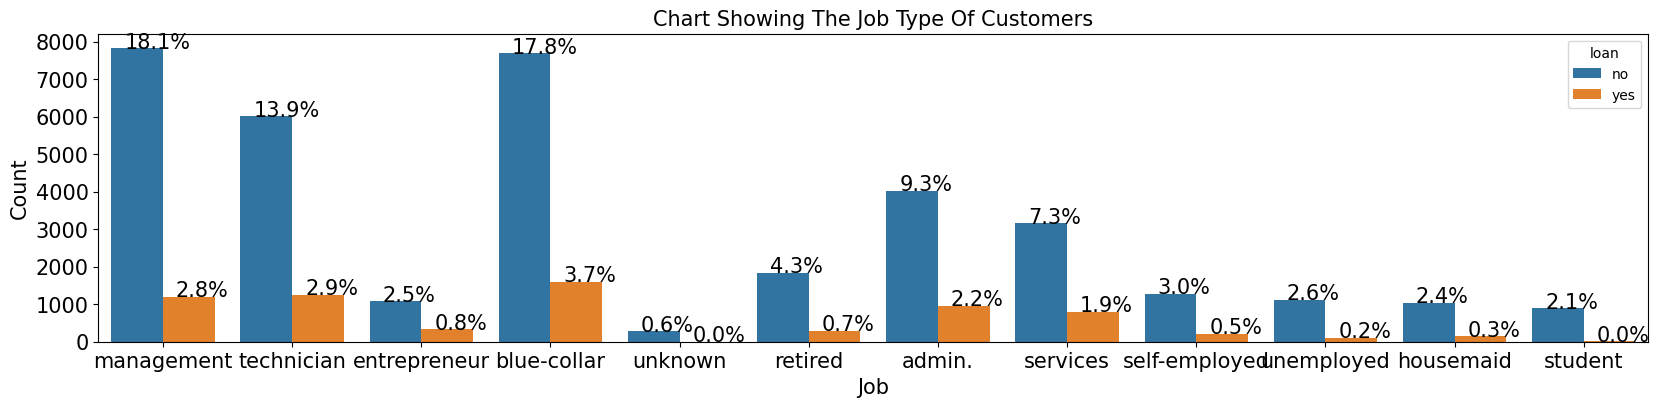

In [74]:
# Job types analysis

plt.figure(figsize=(20,4))
ax = sns.countplot(x=df_no_outlier['job'],hue='loan', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Job', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing The Job Type Of Customers', size=15)

# Calculate percentages
total = float(len(df_no_outlier['job']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

### 3.3 Analyzing Job Class that collect more loan

---



In [75]:
# Getting the percentage representaton of the job and default column
cross_tab_job = pd.crosstab(index=df_no_outlier['job'],
                             columns=df_no_outlier['default'],
                             normalize="index")
cross_tab_job

default,no,yes
job,,
admin.,0.985560,0.014440
blue-collar,0.978471,0.021529
entrepreneur,0.963457,0.036543
housemaid,0.983051,0.016949
management,0.982378,0.017622
retired,0.987873,0.012127
self-employed,0.979223,0.020777
services,0.981859,0.018141
student,0.996685,0.003315


In [76]:
# Getting the count representaton of the job and default column
cross_job = pd.crosstab(index=df_no_outlier['job'],
                        columns=df_no_outlier['default'])
cross_job

default,no,yes
job,,
admin.,4914,72
blue-collar,9090,200
entrepreneur,1371,52
housemaid,1160,20
management,8864,159
retired,2118,26
self-employed,1461,31
services,3897,72
student,902,3


### Narration:
The job categories with the highest default rates are blue-collar, management, technician, and entrepreneur, accounting for 2.1%, 1.7%, 1.7%, and 3.6% respectively. 

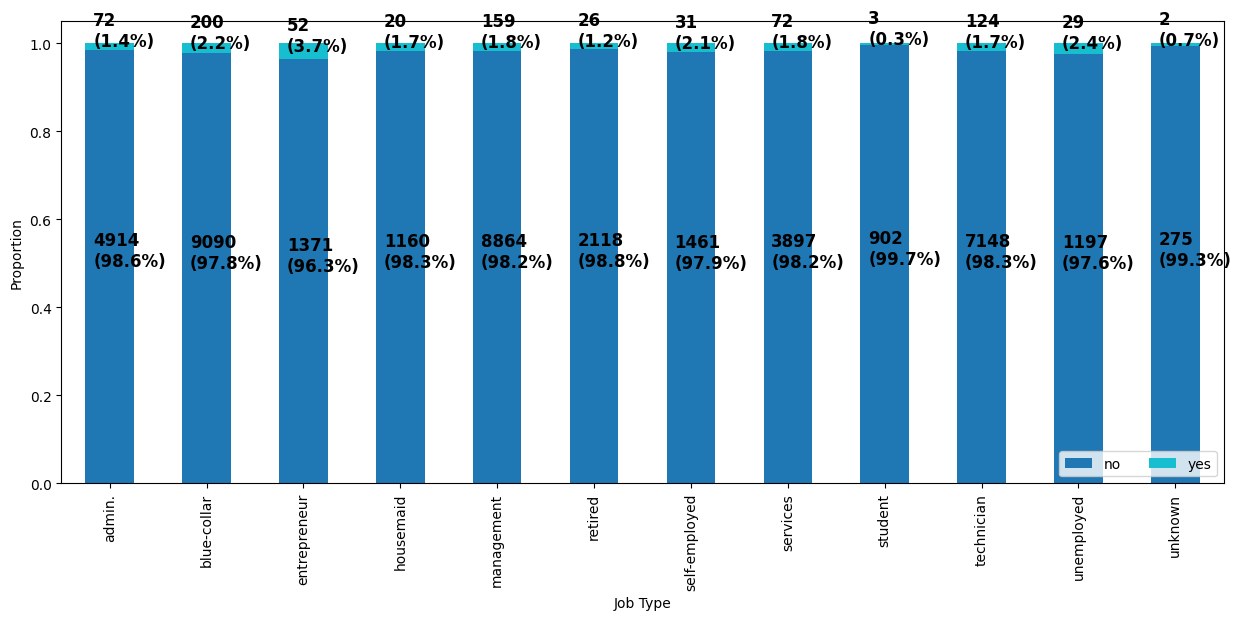

In [77]:
cross_tab_job.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(15, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Job Type")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_job.loc[x],
                                          cross_job.loc[x],
                                          cross_tab_job.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### Narration:
Narration 9:
The entrepreneur job type had the highest percentage of defaults, with 3.7% of all entrepreneurs defaulting. On the other hand, students had the lowest default rate among all students.

In [78]:
df_job = df_no_outlier[['job', 'default', 'deposit']]
df_job.head(20)

,job,default,deposit
0,management,no,no
1,technician,no,no
2,entrepreneur,no,no
3,blue-collar,no,no
4,unknown,no,no
5,management,no,no
6,management,no,no
7,entrepreneur,yes,no
8,retired,no,no
9,technician,no,no


In [79]:
# Analyzing only job types that defaulted
# Removing the row with 'no' in the default column

df_job = df_job[df_job['default'] != 'no']

print(df_job.head(30))

               job default deposit
7     entrepreneur     yes      no
79        services     yes      no
338         admin.     yes      no
419     technician     yes      no
458    blue-collar     yes      no
508        retired     yes      no
562   entrepreneur     yes      no
572    blue-collar     yes      no
596       services     yes      no
636    blue-collar     yes      no
689    blue-collar     yes      no
767     technician     yes      no
805    blue-collar     yes      no
838    blue-collar     yes      no
852     management     yes      no
884     management     yes      no
932    blue-collar     yes      no
933    blue-collar     yes      no
941    blue-collar     yes      no
1116   blue-collar     yes      no
1169   blue-collar     yes      no
1197    management     yes      no
1199   blue-collar     yes      no
1223   blue-collar     yes      no
1259   blue-collar     yes      no
1325   blue-collar     yes      no
1335    management     yes      no
1364    unemployed  

In [80]:
# Confirming the removal
df_job['default'].unique()

array(['yes'], dtype=object)

In [81]:
# Reset the index
df_job = df_job.reset_index(drop=True)
df_job.head()

,job,default,deposit
0,entrepreneur,yes,no
1,services,yes,no
2,admin.,yes,no
3,technician,yes,no
4,blue-collar,yes,no


In [82]:
# checking the percentage of those that made deposit in the job types

cross_ddf_job = pd.crosstab(index=df_job['job'],
                             columns=df_job['deposit'],
                             normalize="index")
cross_ddf_job

deposit,no,yes
job,,
admin.,0.958333,0.041667
blue-collar,0.930000,0.070000
entrepreneur,0.923077,0.076923
housemaid,1.000000,0.000000
management,0.962264,0.037736
retired,0.961538,0.038462
self-employed,1.000000,0.000000
services,0.972222,0.027778
student,1.000000,0.000000


In [83]:
# Getting the count representaton of the deposit

cross_job_df = pd.crosstab(index=df_job['job'],
                        columns=df_job['deposit'])
cross_job_df

deposit,no,yes
job,,
admin.,69,3
blue-collar,186,14
entrepreneur,48,4
housemaid,20,0
management,153,6
retired,25,1
self-employed,31,0
services,70,2
student,3,0


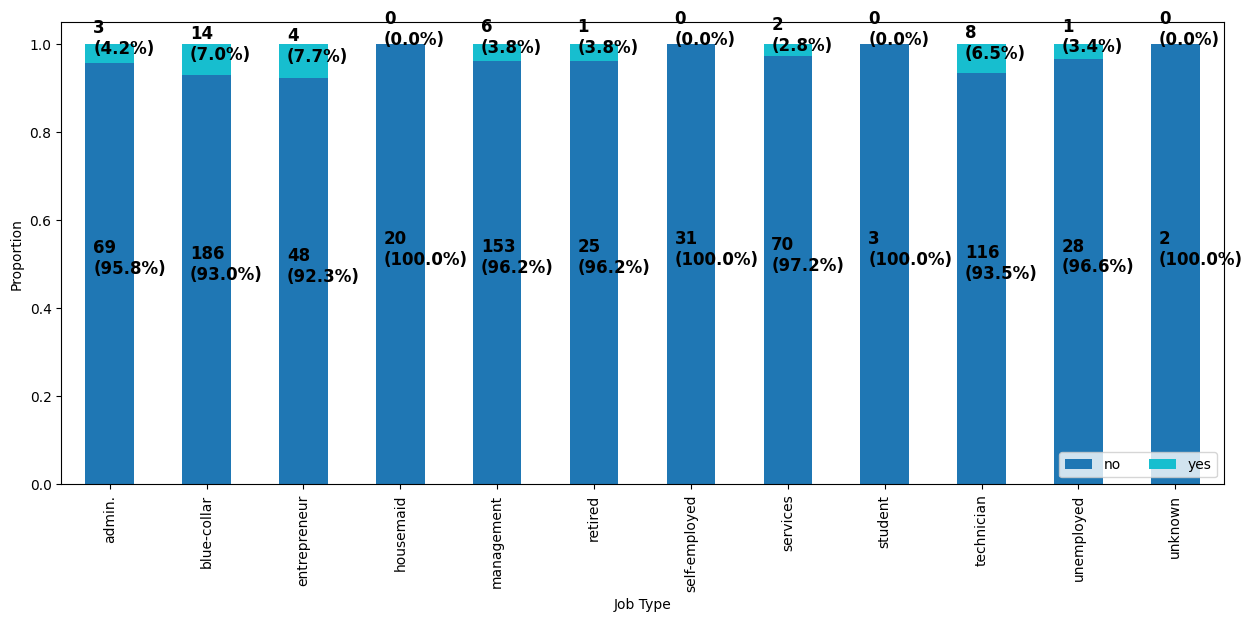

In [84]:
cross_ddf_job.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(15, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Job Type")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross_ddf_job.loc[x],
                                          cross_job_df.loc[x],
                                          cross_ddf_job.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### Narration:
The chart displayed represents only defaulting customers under different job types. It reveals that customers with unknown job types, self-employed individuals, housemaids, and students had a 100% default rate and were given loans. Additionally, over 90% of customers who were given loans did not make deposits.

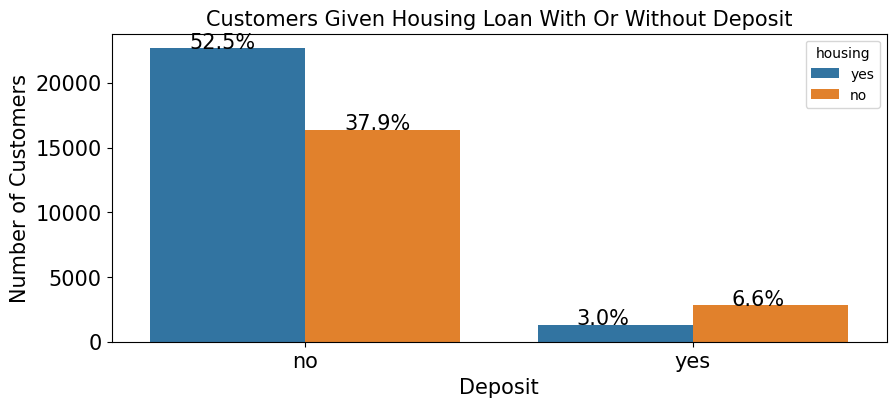

In [85]:
# Analyzing the type of customers given housing loan

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['deposit'], hue='housing', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Deposit', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('Customers Given Housing Loan With Or Without Deposit', size=15)

# Calculate percentages
total = float(len(df_no_outlier['deposit']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

### Narration:
Among customers who did not make a deposit, 52.5% were given housing loans. Conversely, among customers who made a deposit, only 3% were given loans.

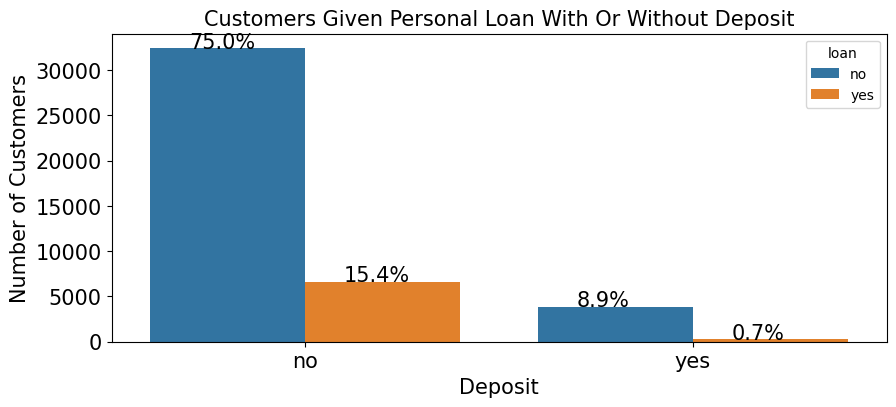

In [86]:
# Analyzing the type of customers given personal loan

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['deposit'], hue='loan', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Deposit', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('Customers Given Personal Loan With Or Without Deposit', size=15)

# Calculate percentages
total = float(len(df_no_outlier['deposit']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

### Narration:
15.4% of customers were given loans without making a deposit, which is higher than the 0.7% of customers who made a deposit and were given loans.


### 3.4 Analyzing customers that defaulted in paying housing loans

---



In [87]:
# Retrieving the percentage representaton of the housing-default columns
cross_tab_housing = pd.crosstab(index=df_no_outlier['housing'],
                             columns=df_no_outlier['default'],
                             normalize="index")
cross_tab_housing

default,no,yes
housing,,
no,0.980842,0.019158
yes,0.982401,0.017599


In [88]:
# Retrieving the count representaton of the deposit-default columns
cross_tab_h = pd.crosstab(index=df_no_outlier['housing'],
                        columns=df_no_outlier['default'])
cross_tab_h

default,no,yes
housing,,
no,18841,368
yes,23556,422


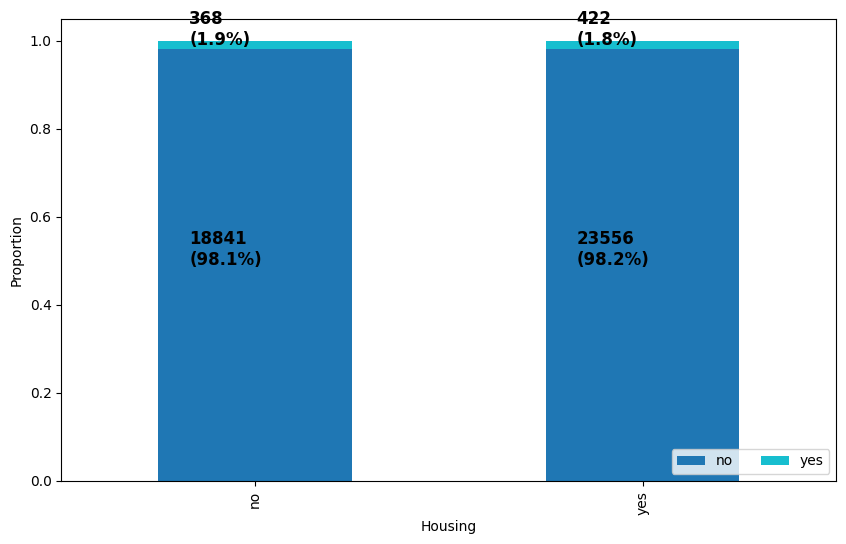

In [89]:
cross_tab_housing.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Housing")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_h.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_housing.loc[x],
                                          cross_tab_h.loc[x],
                                          cross_tab_housing.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### Narration:
From the chart, it can be observed that 1.8% of customers who received housing loans ended up defaulting.


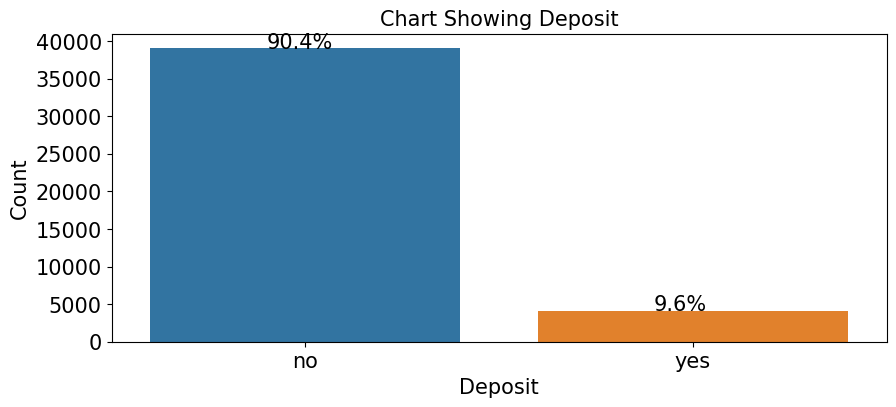

In [90]:
# Analyzing the deposit
plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['deposit'], data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Deposit', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing Deposit', size=15)

# Percentage calculation
total = float(len(df_no_outlier['deposit']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

### Narration:
Only 9.6% of customers made deposits at the bank whereas a staggering 90.4% did not.

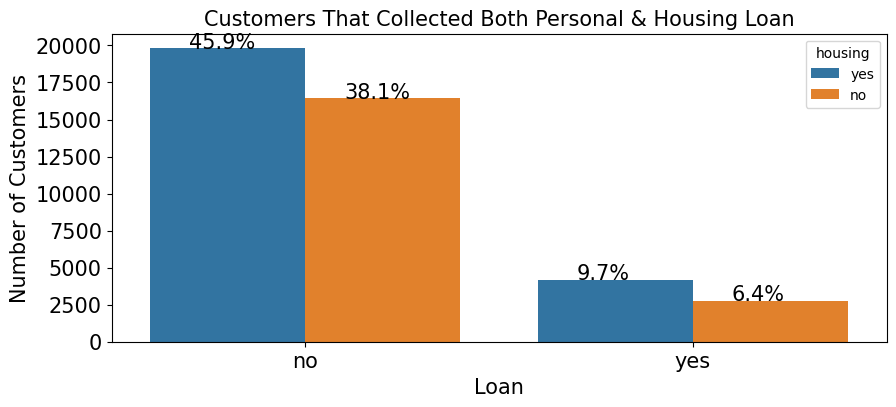

In [91]:
# Analyzing the customers given both personal-housing loans

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['loan'], hue='housing', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Loan', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('Customers That Collected Both Personal & Housing Loan', size=15)

# Percentage calculation
total = float(len(df_no_outlier['loan']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

### Narration:
Out of all customers, 9.7% were given both housing and personal loans, 45.9% were given only housing loans, 6.4% were given only personal loans, and 38.1% did not receive any type of loan.

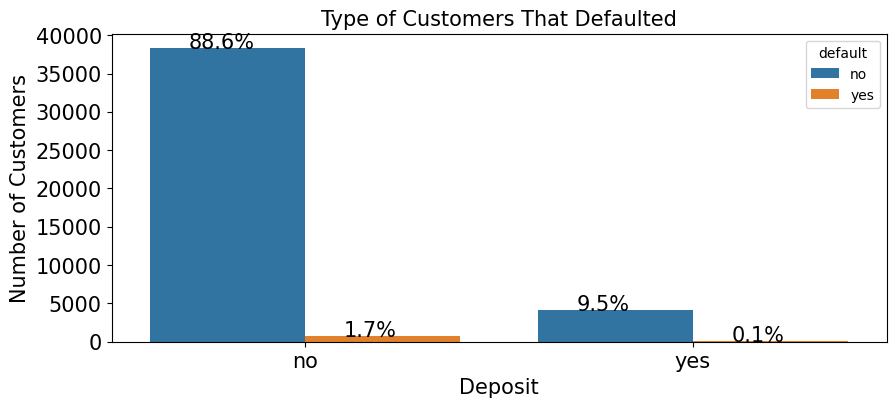

In [92]:
# Analyzing customers that defaulted there loans

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['deposit'], hue='default', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Deposit', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('Type of Customers That Defaulted', size=15)

# Percentage calculation
total = float(len(df_no_outlier['deposit']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

### Narration:
Narration 16:
1.7% of customers who did not make a deposit were still given loans.


In [93]:
# Obtaining percentage representaton of the deposit-default columns
cross_tab_prop = pd.crosstab(index=df_no_outlier['deposit'],
                             columns=df_no_outlier['default'],
                             normalize="index")
cross_tab_prop

default,no,yes
deposit,,
no,0.980761,0.019239
yes,0.990607,0.009393


In [94]:
# Obtaining count representaton of the deposit-default columns
cross_tab = pd.crosstab(index=df_no_outlier['deposit'],
                        columns=df_no_outlier['default'])
cross_tab

default,no,yes
deposit,,
no,38284,751
yes,4113,39


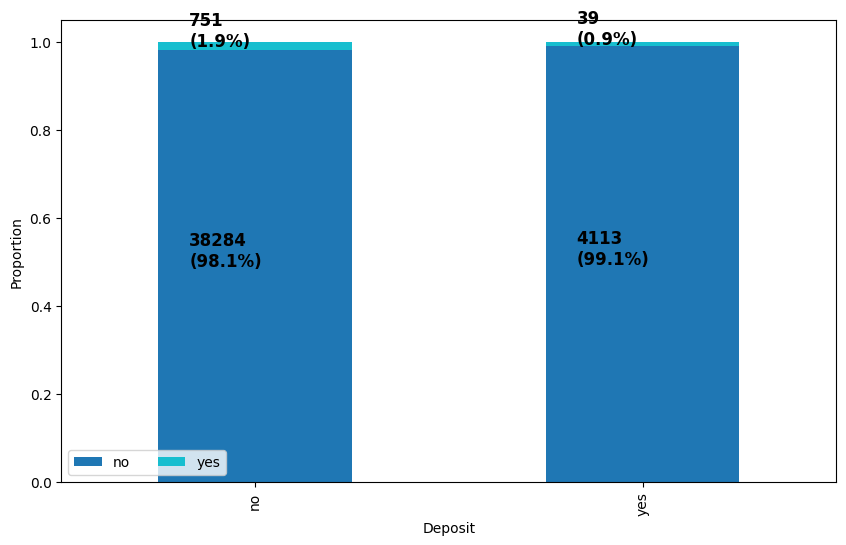

In [95]:
cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Deposit")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### Narration: 
In the stacked column chart, it is evident that 1.9% of the entire population who did not make a deposit ended up defaulting, while 0.9% of the entire population who made a deposit also defaulted. This suggests a higher likelihood of default among customers who did not make a deposit.


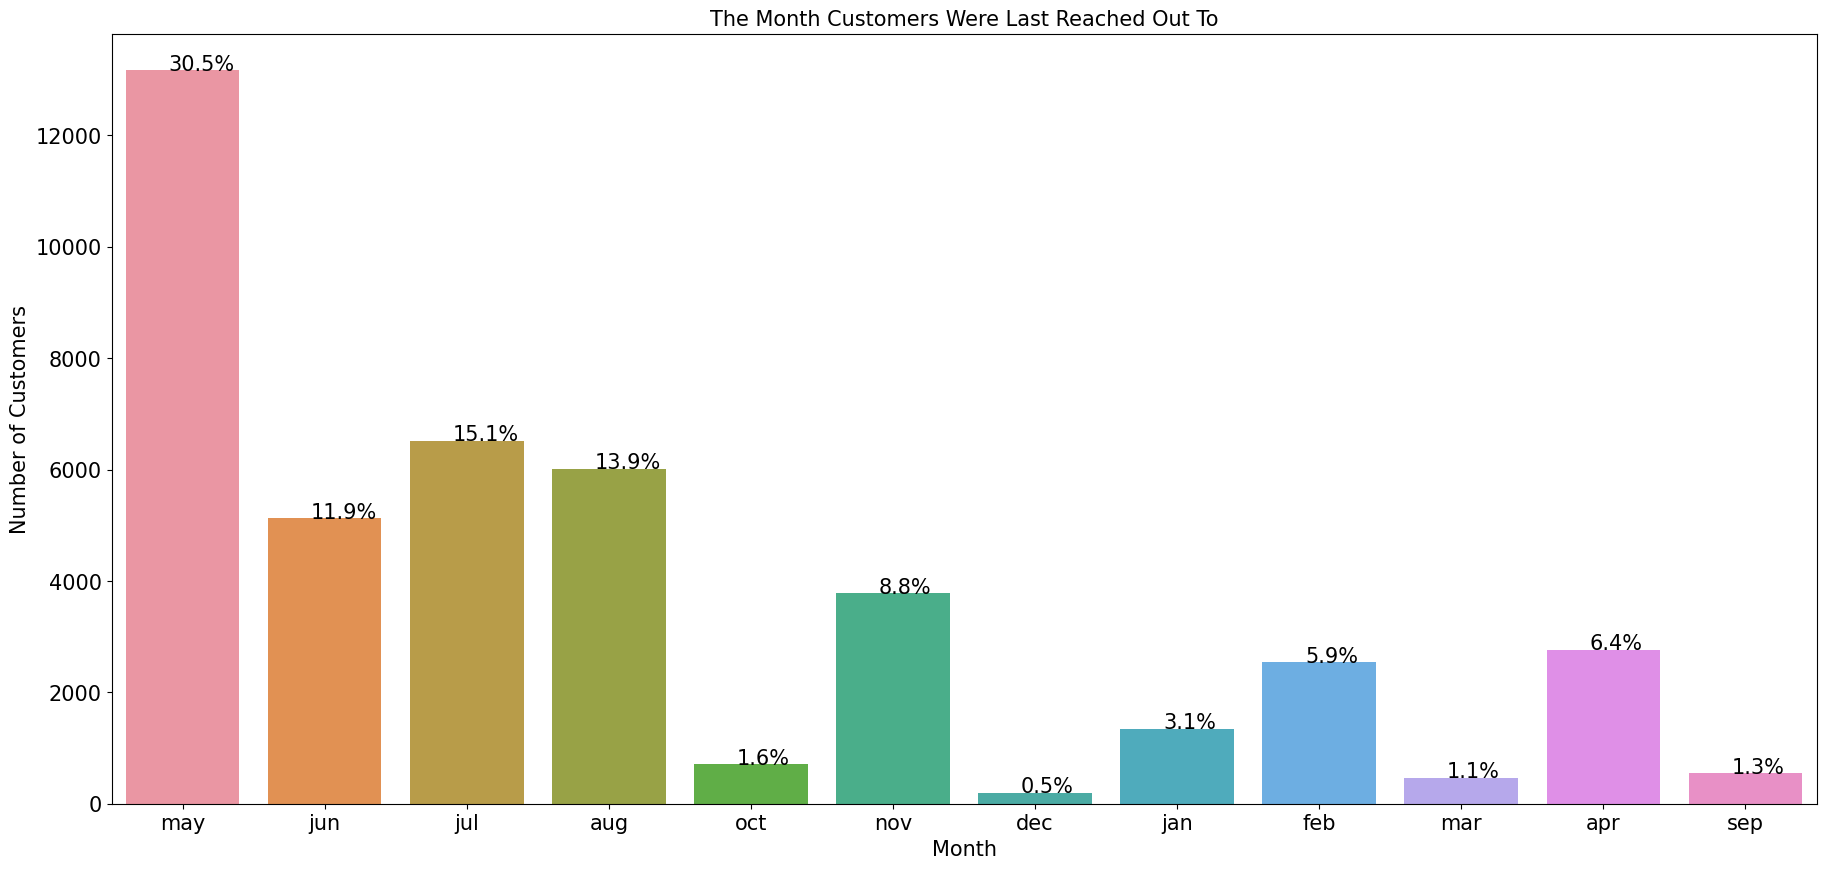

In [96]:
# Analyzing the number of customers reached out to in each month
plt.figure(figsize=(22,10))
ax = sns.countplot(x=df_no_outlier['month'], data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Month', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('The Month Customers Were Last Reached Out To', size=15)

# Percentage calculation
total = float(len(df_no_outlier['loan']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

### Narration:
There was a higher number of customers reached out to in the month of May.


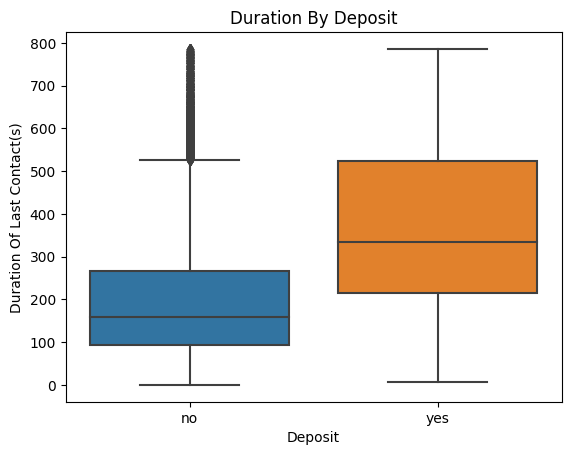

In [97]:
sns.boxplot(x='deposit', y='duration', data=df_no_outlier)
plt.xlabel('Deposit')
plt.ylabel('Duration Of Last Contact(s)')
plt.title('Duration By Deposit');

### Narration:
The boxplot analysis shows a slight overlap between customers who made deposits and those who did not. Within the contact duration of 340 to 540, customers who made deposits were more dispersed from the median compared to those below the median. The chart also indicates a higher probability of customers making deposits when contacted for durations between 280 and 540.


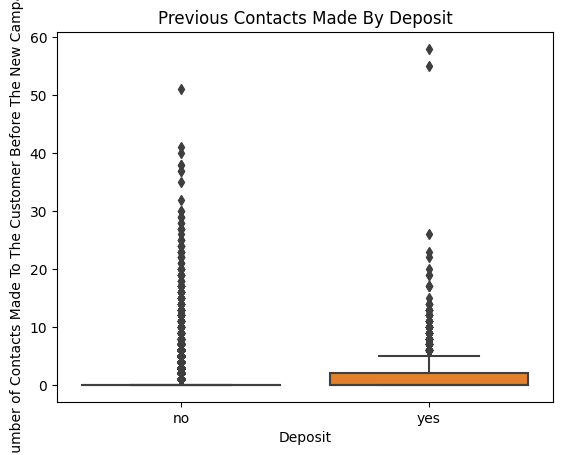

In [98]:
sns.boxplot(x='deposit', y='previous', data=df_no_outlier)
plt.xlabel('Deposit')
plt.ylabel('Number of Contacts Made To The Customer Before The New Campaign')
plt.title('Previous Contacts Made By Deposit');

### Narration:
The chart demonstrates that for both instances, beyond the mean value of zero, customers in the 'Yes' instance are dispersed above the median value, while some customers are clustered around the mean in both instances.


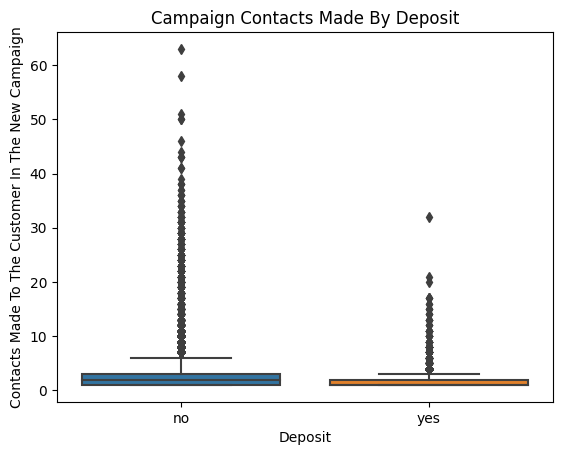

In [99]:
sns.boxplot(x='deposit', y='campaign', data=df_no_outlier)
plt.xlabel('Deposit')
plt.ylabel('Contacts Made To The Customer In The New Campaign')
plt.title('Campaign Contacts Made By Deposit');

### Narration:

### 3.5 Analysis of the deposit against pervious and campaign columns.

In [100]:
# Creating a new data frame
df_group_1=df_no_outlier[['deposit', 'campaign', 'previous']]
df_group_1

,deposit,campaign,previous
0,no,1,0
1,no,1,0
2,no,1,0
3,no,1,0
4,no,1,0
...,...,...,...
45204,yes,1,8
45205,yes,2,0
45207,yes,2,0
45209,no,4,0


In [101]:
df_group_1.describe()

,campaign,previous
count,43187.000000,43187.000000
mean,2.768333,0.576238
std,3.117429,1.911847
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,0.000000
max,63.000000,58.000000


In [102]:
# Grouping the colums by the deposit column
df_group_1 = df_group_1.groupby(['deposit'],as_index=False).mean()
df_group_1

,deposit,campaign,previous
0,no,2.849135,0.495760
1,yes,2.008671,1.332852


### Narration:
The table provides insight into the interaction between deposit, campaign, and previous campaign. On average, customers needed to be contacted 1.3 times in the previous campaign to make a deposit, whereas in the new campaign, the average number of contacts required increased to 2.


In [103]:
# Analysing the depposit against poutcome, campaign and previous features
df_group_one=df_no_outlier[['deposit','poutcome', 'campaign', 'previous']]
df_group_one

,deposit,poutcome,campaign,previous
0,no,unknown,1,0
1,no,unknown,1,0
2,no,unknown,1,0
3,no,unknown,1,0
4,no,unknown,1,0
...,...,...,...,...
45204,yes,failure,1,8
45205,yes,unknown,2,0
45207,yes,unknown,2,0
45209,no,unknown,4,0


In [104]:
df_group_one.describe()

,campaign,previous
count,43187.000000,43187.000000
mean,2.768333,0.576238
std,3.117429,1.911847
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,0.000000
max,63.000000,58.000000


In [105]:
# Analyzing for multiple categories

df_group_test = df_no_outlier[['deposit','poutcome', 'campaign', 'previous']]
grouped_test = df_group_test.groupby(['poutcome', 'deposit'],as_index=False).mean()
grouped_test

,poutcome,deposit,campaign,previous
0,failure,no,2.011423,2.858877
1,failure,yes,1.697543,3.102079
2,other,no,2.553918,3.862693
3,other,yes,2.037594,4.135338
4,success,no,1.980695,3.007722
5,success,yes,1.701639,3.050273
6,unknown,no,2.983517,0.000427
7,unknown,yes,2.187961,0.000819


In [106]:
# Converting multiple categories to pivot for readability

grouped_pivot = grouped_test.pivot(index='poutcome', columns='deposit')
grouped_pivot

campaign            previous          
deposit         no       yes        no       yes
poutcome                                        
failure   2.011423  1.697543  2.858877  3.102079
other     2.553918  2.037594  3.862693  4.135338
success   1.980695  1.701639  3.007722  3.050273
unknown   2.983517  2.187961  0.000427  0.000819

### Narration:
Based on the pivot table, the average number of contacts for a successful promotion was found to be lower when the campaign feature had 1.7 contacts.


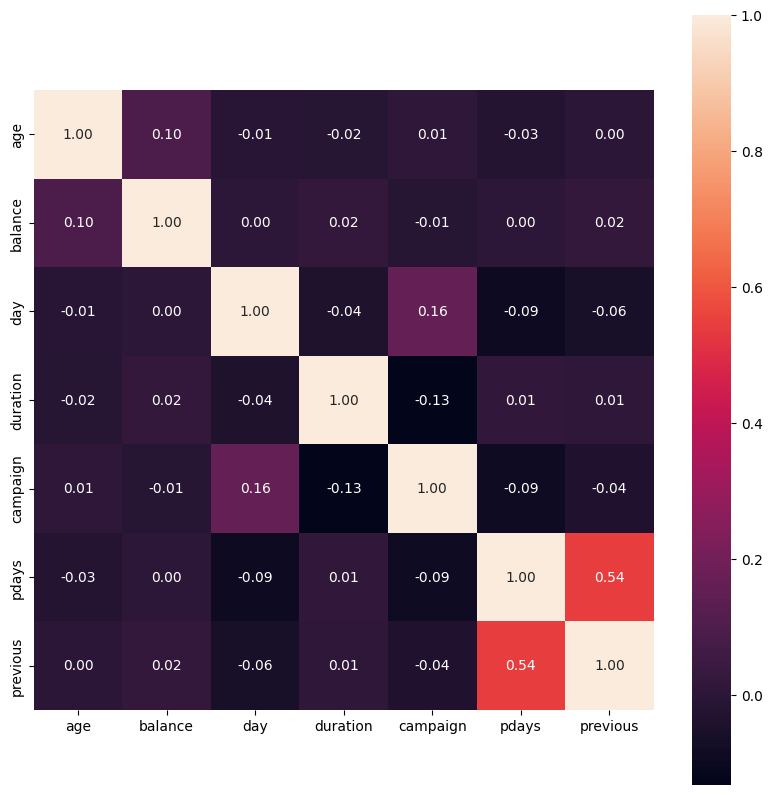

In [107]:
# Visual of the correlation matrix
plt.figure(figsize = (10,10))
hm = sns.heatmap (df_no_outlier.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10})

### Narration:
The chart above shows correlation across both axis.

<Axes: xlabel='previous', ylabel='pdays'>

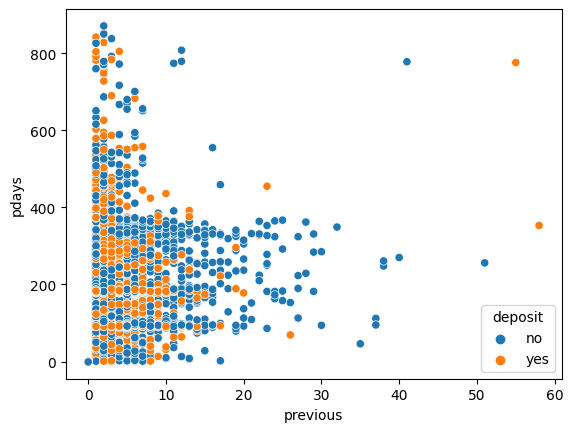

In [108]:
sns.scatterplot(x='previous', y='pdays', data=df_no_outlier, hue='deposit')

### Narration:
The scattered plot showsa distribution of non-deposit at 0 to 40 whereas a sparse amount of pdays made deposit along the 55-60 previous intersection.

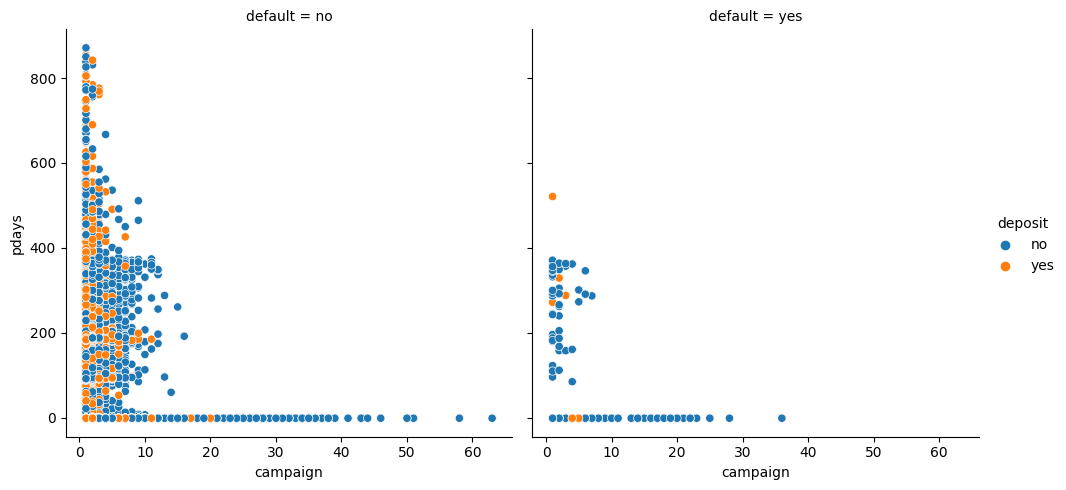

In [109]:
sns.relplot(
    data=df_no_outlier,
    x="campaign", y="pdays", hue="deposit", col="default",
)

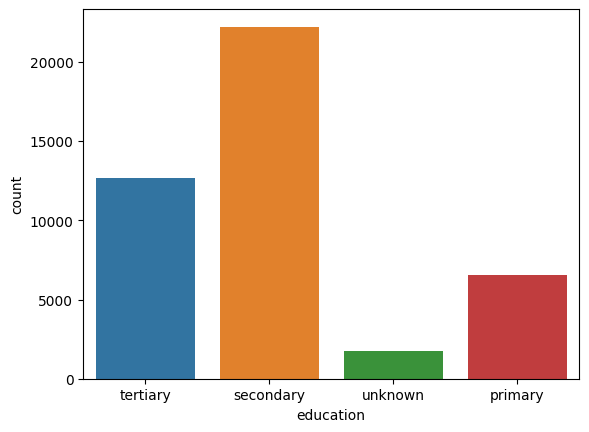

In [110]:
sns.countplot(x='education', data=df_no_outlier);

### Narration:
The plot above shows secondary education having the highest at 2600 whereas 'unknown' education is the least with 250.

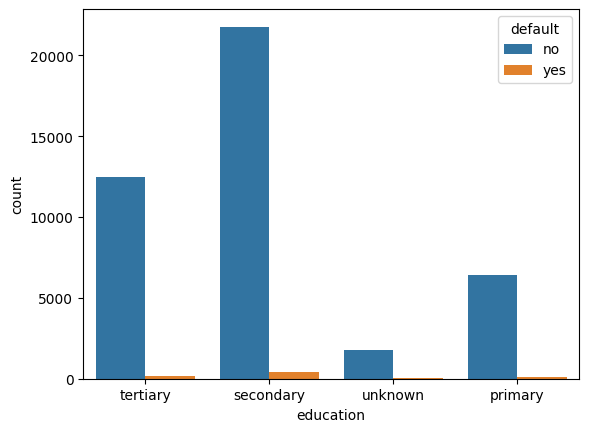

In [111]:
sns.countplot(x='education',hue='default', data=df_no_outlier);

### 4.0 Feature Engineering

---



In [112]:
# Encoding the education column
le = LabelEncoder()

df_no_outlier['education'] = le.fit_transform(df_no_outlier['education'])

In [113]:
df_no_outlier.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket
0,58,management,married,2,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Old Adult (<=70)
1,44,technician,single,1,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Adults (<=45)
2,33,entrepreneur,married,1,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Adults (<=45)
3,47,blue-collar,married,3,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Old Adult (<=70)
4,33,unknown,single,3,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Adults (<=45)


In [114]:
# encoding the categorical features
le = LabelEncoder()

df_no_outlier['job'] = le.fit_transform(df_no_outlier['job'])


df_no_outlier['marital'] = le.fit_transform(df_no_outlier['marital'])


df_no_outlier['poutcome'] = le.fit_transform(df_no_outlier['poutcome'])

df_no_outlier['month'] = le.fit_transform(df_no_outlier['month'])

df_no_outlier['contact'] = le.fit_transform(df_no_outlier['contact'])

df_no_outlier['default'] = le.fit_transform(df_no_outlier['default'])

df_no_outlier['housing'] = le.fit_transform(df_no_outlier['housing'])

df_no_outlier['loan'] = le.fit_transform(df_no_outlier['loan'])

df_no_outlier['deposit'] = le.fit_transform(df_no_outlier['deposit'])

df_no_outlier['age_bracket'] = le.fit_transform(df_no_outlier['age_bracket'])

df_no_outlier.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,2
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,2
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0


In [115]:
df_no_outlier.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'age_bracket'],
      dtype='object')

### 5.0 **Machine Learning**
---
**Supervised Learning**


In [116]:
df1 = df_no_outlier[['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'poutcome','balance','duration']]

label = df_no_outlier['deposit']

In [117]:
df1

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,balance,duration
0,58,4,1,2,0,1,0,2,5,8,1,-1,0,3,2143,261
1,44,9,2,1,0,1,0,2,5,8,1,-1,0,3,29,151
2,33,2,1,1,0,1,1,2,5,8,1,-1,0,3,2,76
3,47,1,1,3,0,1,0,2,5,8,1,-1,0,3,1506,92
4,33,11,2,3,0,0,0,2,5,8,1,-1,0,3,1,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,5,1,1,0,0,0,0,17,9,1,40,8,0,2850,300
45205,25,9,2,1,0,0,1,0,17,9,2,-1,0,3,505,386
45207,71,5,0,0,0,0,0,0,17,9,2,-1,0,3,1729,456
45209,57,1,1,1,0,0,0,1,17,9,4,-1,0,3,668,508


In [118]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43187 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        43187 non-null  int64
 1   job        43187 non-null  int64
 2   marital    43187 non-null  int64
 3   education  43187 non-null  int64
 4   default    43187 non-null  int64
 5   housing    43187 non-null  int64
 6   loan       43187 non-null  int64
 7   contact    43187 non-null  int64
 8   day        43187 non-null  int64
 9   month      43187 non-null  int64
 10  campaign   43187 non-null  int64
 11  pdays      43187 non-null  int64
 12  previous   43187 non-null  int64
 13  poutcome   43187 non-null  int64
 14  balance    43187 non-null  int64
 15  duration   43187 non-null  int64
dtypes: int64(16)
memory usage: 6.6 MB


In [119]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [120]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,balance,duration
37791,33,1,1,1,0,1,0,0,14,8,2,370,8,1,245,437
21641,39,4,2,2,1,1,0,0,19,1,4,-1,0,3,-401,274
18256,56,4,1,2,0,0,0,0,31,5,12,-1,0,3,25290,81
31088,27,6,2,2,0,0,0,0,16,3,1,-1,0,3,516,57
34574,30,7,1,1,0,1,0,0,5,8,2,-1,0,3,253,235


In [121]:
y_train.head()

37791    0
21641    0
18256    0
31088    0
34574    0
Name: deposit, dtype: int64

In [122]:
X_test.head()

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,balance,duration
23201,59,5,1,0,0,1,0,0,27,1,4,-1,0,3,-47,84
26156,51,4,0,2,0,1,0,0,20,9,3,-1,0,3,2011,118
29527,52,7,1,0,0,1,1,0,3,3,1,-1,0,3,3016,142
19000,46,4,1,2,0,0,0,0,5,1,2,-1,0,3,1720,250
6344,60,9,0,2,0,1,0,2,27,8,1,-1,0,3,-317,498


In [123]:
y_test.head()

23201    0
26156    0
29527    0
19000    0
6344     0
Name: deposit, dtype: int64

### 6.0 Model Building

---



### 6.1 Logistic Regression

---



In [124]:
# Model building

# Logistic Regression

logreg = LogisticRegression() #logreg is a variable name assigned to LogisticRegression(), it can be anything

logreg.fit(X_train, y_train)  # this is basically machine learning

ly_pred = logreg.predict(X_test) # machine testing
#
print('Score of train:', logreg.score(X_train, y_train))
#
print('Score of test:', logreg.score(X_test, y_test))
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, ly_pred))
print('Precision:', precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1-score:', f1_score(y_test, ly_pred))
print('AUC-ROC:', roc_auc_score(y_test, ly_pred))

# Calculate R-squared score
r2 = r2_score(y_test, ly_pred)
print('R_squared score: ', r2)

Score of train: 0.8987235520564995
Score of test: 0.9056494558925677
Logistic Regression
Accuracy: 0.9056494558925677
Precision: 0.4090909090909091
Recall: 0.09195402298850575
F1-score: 0.15015641293013557
AUC-ROC: 0.5393570242249975
R_squared score:  -0.14462402436238553


### Narration:
The relatively similar percentages of the test score and train score indicate that there is no overfitting in the features used in the machine learning model.


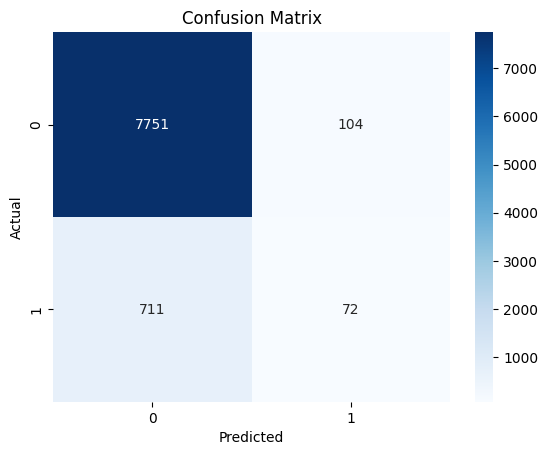

In [125]:
# Confusion Matrix For Logistic Regression

lcm = confusion_matrix(y_test, ly_pred)

# visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show;

### Narration:
Narration 24:
The confusion matrix of the logistic regression correctly predicted that 7758 customers did not make deposits and 71 customers made deposits. However, it incorrectly predicted that 97 customers made deposits and 712 customers did not make deposits.


In [126]:
# Initialize the classifier
xgb_classifier = XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)
# Make predictions
y_pred = xgb_classifier.predict(X_test)

print('Score of train:', logreg.score(X_train, y_train))
#
print('Score of test:', logreg.score(X_test, y_test))
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, y_pred))

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print('R_squared score: ', r2)

Score of train: 0.8987235520564995
Score of test: 0.9056494558925677
Logistic Regression
Accuracy: 0.9260245427182218
Precision: 0.6374045801526718
Recall: 0.42656449553001274
F1-score: 0.5110941086457537
AUC-ROC: 0.7011880402538669
R_squared score:  0.10255858703366338


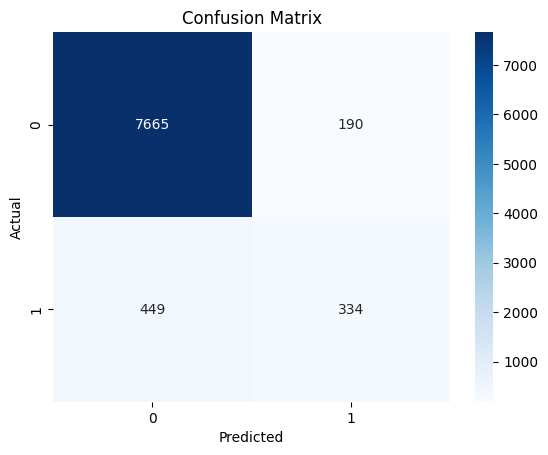

In [127]:
# Confusion Matrix For XGB Classifier

lcm = confusion_matrix(y_test, y_pred)

# visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show;

In [128]:
# Random forest classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print('Score of train:', rfc.score(X_train, y_train))
print('Score of test:', rfc.score(X_test, y_test))
print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rfc_pred))
print('Precision:', precision_score(y_test, rfc_pred))
print('Recall:', recall_score(y_test, rfc_pred))
print('F1-score:', f1_score(y_test, rfc_pred))
print('AUC-ROC:', roc_auc_score(y_test, rfc_pred))
# Calculate R-squared score
r2 = r2_score(y_test, rfc_pred)
print('R_squared score: ', r2)

Score of train: 1.0
Score of test: 0.923361889326233
Random Forest Classifier
Accuracy: 0.923361889326233
Precision: 0.6479217603911981
Recall: 0.3384418901660281
F1-score: 0.4446308724832215
AUC-ROC: 0.6600548088640452
R_squared score:  0.07025631395349785


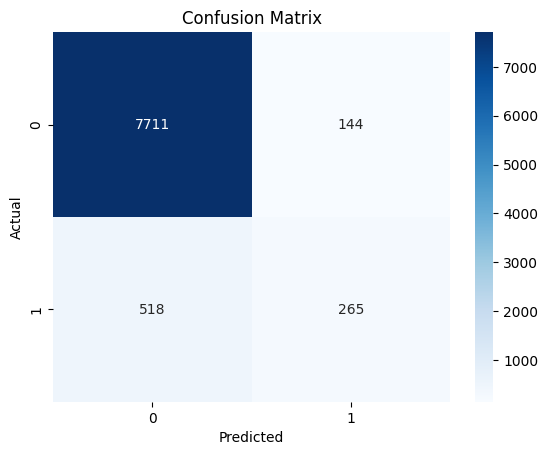

In [129]:
# Confusion Matrix For Logistic Regression

rcm = confusion_matrix(y_test, rfc_pred)

# visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show;

In [130]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

print('Score of train:', dtc.score(X_train, y_train))
print('Score of test:', dtc.score(X_test, y_test))
print('Decision Tree Classifier')
print('Accuracy:', accuracy_score(y_test, dtc_pred))
print('Precision:', precision_score(y_test, dtc_pred))
print('Recall:', recall_score(y_test, dtc_pred))
print('F1-score:', f1_score(y_test, dtc_pred))
print('AUC-ROC:', roc_auc_score(y_test, dtc_pred))
# Calculate R-squared score
r2 = r2_score(y_test, dtc_pred)
print('R_squared score: ', r2)

Score of train: 1.0
Score of test: 0.8931465617040981
Decision Tree Classifier
Accuracy: 0.8931465617040981
Precision: 0.41935483870967744
Recall: 0.4648786717752235
F1-score: 0.4409448818897638
AUC-ROC: 0.700357859121221
R_squared score:  -0.29630426317359726


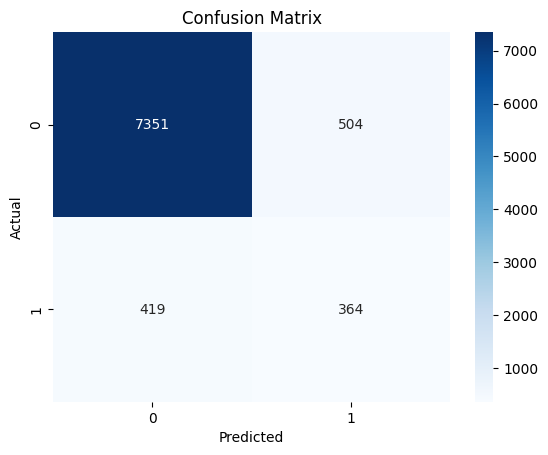

In [131]:
# Confusion Matrix For Logistic Regression

dcm = confusion_matrix(y_test, dtc_pred)

# visualize the confusion matrix
sns.heatmap(dcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show;

In [132]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = dtc.predict(X_test)

print('Score of train:', gb.score(X_train, y_train))
print('Score of test:', gb.score(X_test, y_test))
print('Decision Tree Classifier')
print('Accuracy:', accuracy_score(y_test, gb_pred))
print('Precision:', precision_score(y_test, gb_pred))
print('Recall:', recall_score(y_test, gb_pred))
print('F1-score:', f1_score(y_test, gb_pred))
print('AUC-ROC:', roc_auc_score(y_test, gb_pred))
# Calculate R-squared score
r2 = r2_score(y_test, gb_pred)
print('R_squared score: ', r2)

Score of train: 0.9225737358534256
Score of test: 0.9230145867098866
Decision Tree Classifier
Accuracy: 0.8931465617040981
Precision: 0.41935483870967744
Recall: 0.4648786717752235
F1-score: 0.4409448818897638
AUC-ROC: 0.700357859121221
R_squared score:  -0.29630426317359726


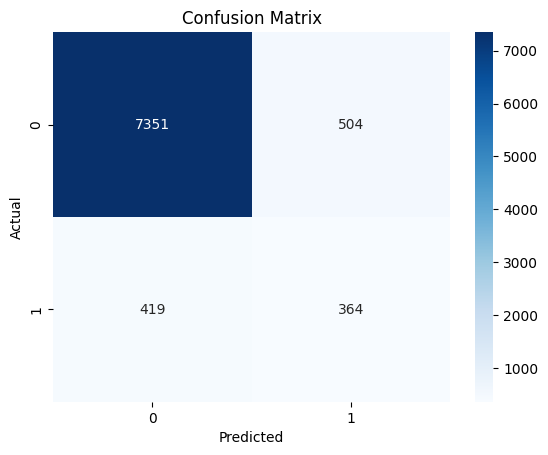

In [133]:
# Confusion Matrix For Logistic Regression

gcm = confusion_matrix(y_test, gb_pred)

# visualize the confusion matrix
sns.heatmap(gcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show;

### 7.0 Normalization

---



In [134]:
# minmaxscaler ensures all the variables falls between 0 and 1
# it is used to check and normalize outliers

scaler = MinMaxScaler()

df1['Scaled_bal'] = scaler.fit_transform(df1['balance'].values.reshape(-1,1))
df1['Scaled_dur'] = scaler.fit_transform(df1['duration'].values.reshape(-1,1))


df1.drop(['balance', 'duration'], axis=1, inplace=True) # this helps to remove the colums of the highlighted feature.

df1.head()

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Scaled_bal,Scaled_dur
0,58,4,1,2,0,1,0,2,5,8,1,-1,0,3,0.092259,0.332061
1,44,9,2,1,0,1,0,2,5,8,1,-1,0,3,0.073067,0.192112
2,33,2,1,1,0,1,1,2,5,8,1,-1,0,3,0.072822,0.096692
3,47,1,1,3,0,1,0,2,5,8,1,-1,0,3,0.086476,0.117048
4,33,11,2,3,0,0,0,2,5,8,1,-1,0,3,0.072812,0.251908


In [135]:
#  Deploying 8 different machine learning models to the dataset

classifiers = [[XGBClassifier(), 'XGB Classifier'],
              [RandomForestClassifier(), 'Random Forest'],
              [KNeighborsClassifier(), 'K-Nearest Neighbors'],
              [SGDClassifier(), 'SGD Classifier'],
              [SVC(), 'SVC'],
              [GaussianNB(), 'Naive Bayes'],
              [DecisionTreeClassifier(random_state=42), 'Decision tree'],
              [LogisticRegression(), 'Logistic Regression']]

In [136]:
acc_list={}
precision_list={}
recall_list={}
roc_list={}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name=classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [137]:
acc_list

{'XGB Classifier': ['92.6%'],
 'Random Forest': ['92.39%'],
 'K-Nearest Neighbors': ['90.1%'],
 'SGD Classifier': ['36.77%'],
 'SVC': ['90.94%'],
 'Naive Bayes': ['84.59%'],
 'Decision tree': ['89.34%'],
 'Logistic Regression': ['90.56%']}

In [138]:
print('Accuracy Score')
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,92.6%,92.39%,90.1%,36.77%,90.94%,84.59%,89.34%,90.56%


In [139]:
print('Precision')
s2 = pd.DataFrame(precision_list)
s2

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,63.74%,66.41%,39.47%,11.49%,0.0%,28.76%,42.05%,40.91%


In [140]:
print('Recall')
s3 = pd.DataFrame(recall_list)
s3

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,42.66%,32.57%,17.24%,89.14%,0.0%,47.38%,46.62%,9.2%


In [141]:
print('ROC Score')
s4 = pd.DataFrame(roc_list)
s4

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,70.12%,65.46%,57.3%,60.35%,50.0%,67.84%,70.11%,53.94%


### 8.0 Drawn Insights

---




Insights drawn based on the provided narrations observed:

The bank's customer base is primarily composed of adults and old adults, with the aged group having the lowest representation.
The largest percentage of customers who did not make a deposit belongs to the adult and old adult age groups.
Customers contacted via cellular communication had a higher success rate compared to other contact modes.
There is no clear distinction in the distribution of customers contacted through different platforms to determine their influence on deposit behavior.
Customers contacted through cellular and telephone communication in the previous campaign have a higher probability of making deposits.
Customers contacted via cellular communication exhibited a higher percentage of deposit behavior.
A significant portion of the bank's customer base comprises blue-collar workers, followed by management, technicians, and administrative staff.
The job categories with the highest default rates are blue-collar, management, technician, and entrepreneur.
Entrepreneurs had the highest percentage of defaults, while students had the lowest default rate among all job types.
Customers with unknown job types, self-employed individuals, housemaids, and students had a 100% default rate and were given loans. Additionally, over 90% of customers who were given loans did not make deposits.
Among customers who did not make a deposit, a majority of them were given housing loans. Conversely, among customers who made a deposit, only a small percentage were given loans.
A higher percentage of customers were given loans without making a deposit compared to those who made a deposit and were given loans.
From the chart, it can be observed that a small percentage of customers who received housing loans ended up defaulting.
Only a small percentage of customers made deposits at the bank.
A certain percentage of customers were given both housing and personal loans, while a larger percentage received only housing loans, only personal loans, or no loans at all.
A small percentage of customers who did not make a deposit were still given loans.
The chart suggests a higher likelihood of default among customers who did not make a deposit.
There was a higher number of customers reached out to in the month of May.
The boxplot analysis indicates that customers contacted for specific durations have a higher probability of making deposits.
The chart shows a difference in dispersion between customers who made deposits and those who did not, with some customers clustered around the mean.
On average, customers needed to be contacted more times in the new campaign compared to the previous campaign to make a deposit.
The average number of contacts for a successful promotion was found to be lower when the campaign feature had 1.7 contacts.
The similarity between the test score and train score suggests no overfitting in the features used in the machine learning model.
The confusion matrix of the logistic regression correctly predicted a significant number of customers who did not make deposits, but had some incorrect predictions for customers who made deposits and customers who did not make deposits.


### 9.0 Recommendations

---




The bank should consider reducing or stopping loans given to customers who do not make deposits.
Bank executives should utilize the procedures used in the previous campaign to increase customer retention and deposits.
The bank should focus on reaching out to customers more through cellular and telephone communication.

In point of fact, it will help a great deal if addtional data columns are added. Namely; The date of the last deposit made by the customer, Requirements for loan approval, Types of accounts held by customers, Collateral required for loan approval and Number of times each customer has received and defaulted on loans.


### 5.0 **Machine Learning**
---
**unsupervised Learning**
(Customers Segmentation).

---



**Business Problem:**

Nexux Bank wants to understand the spending behaviour of its customers to target them with personalized marketing campaigns. They have collected data on customer demographics (age, balance) and depositing habits (balance, day, duration, previous and pdays. Also, they want to segment their customers based on their default habits. The objective of this project is to build a customer segmentation model to help the Bank in developing targeted strategies to predict screenout loan defaulters.

**Data Collection:**

The retail company has collected data on 45211 customers containing; age, balance, day, duration, previous, pdays etc.

**Goal:**

The goal of the portion of this project is to segment customers based on their purchasing behaviour and demographic information. We will use unsupervised learning techniques to identify groups of customers with similar behaviour and characteristics. This information can be used to develop targeted marketing campaigns, personalize product recommendations, and optimize pricing strategies.

In [142]:
# Unsupervised Learning imported libraries
# Import necessary libraries

# Data Analysis libraries
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings("ignore")

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
# Label Encoding
encoder = LabelEncoder() # method initialization

In [146]:
# Looping for columns except Survived
for c in df.columns[1:]:
  if(df[c].dtype=='object'):
    df[c] = encoder.fit_transform(df[c])
  else:
    df[c] = df[c]

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [147]:
# Remove CustomerID Column
df.drop('age', axis=1, inplace=True)
df.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


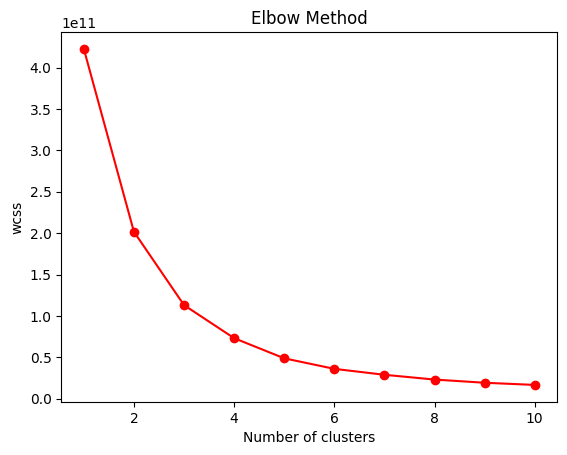

In [148]:
# Determine optimal number of clusters

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Narration:
The ideal number of clusters using k-means is determined to be 5.

In [149]:
from sklearn.cluster import KMeans

In [150]:
# Fit K-means clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(df)

# Add cluster labels to data
df['Cluster'] = kmeans.labels_

In [151]:
import matplotlib.pyplot as plt

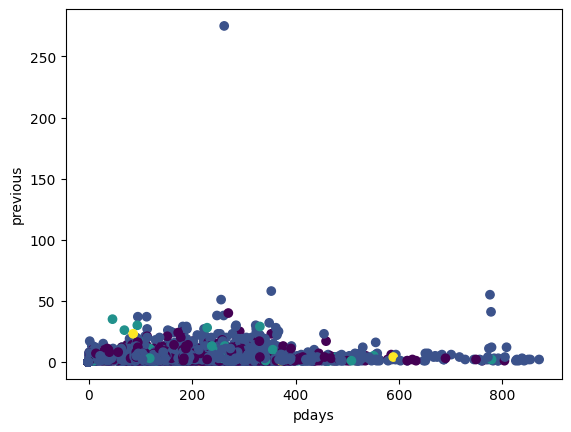

0.6870774393517385

In [154]:
# Visualize cluster results

plt.scatter(df['pdays'], df['previous'], c=kmeans.labels_, label='Centroids')
plt.xlabel('pdays')
plt.ylabel('previous')
plt.show()

#Calculate silhouette Score - evaluation matrix of the clustering algorthim 0.44 

from sklearn.metrics import silhouette_score
silhouette_score(df, kmeans.labels_)

Conclusion:


The clustering algorithm has been assessed by customers and obtained a rating of 0.68. This algorithm groups customers into five different clusters based on their past payment patterns and paydays. These clusters include individuals with low income and late paydays, individuals with low income and high paydays, individuals with average paydays and middle income, individuals with significant paydays and high income, and individuals with minimal paydays and high income.


I appreciate the time you've dedicated. I hope you found this analysis to be enlightening.